# Ch06 Pandas DataFrame 特徵清洗

# Outline

- 空缺值處理
- 異常值定義
- 離群值處理

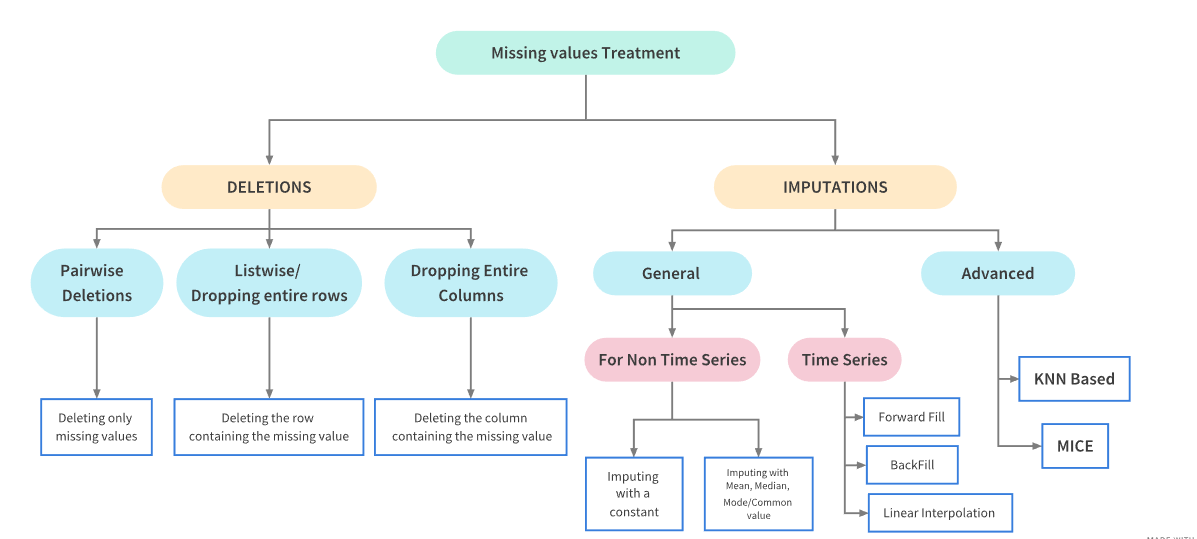

在數據清洗過程中，處理缺失數據是一個關鍵問題。尤其當我們面對樣本量較小的數據集時，找到合適的方法填補這些缺失值對後續分析格外重要。本文將介紹一些處理缺失數據的方法。

通常，缺失的數據可能會用NA、nan、0、.等標記來表示。造成數據缺失的原因主要有兩種：人為錯誤和技術錯誤。為了更好地理解數據缺失的原因，我們可以使用一個非常實用的可視化庫 - `missingno`，這個庫能幫助我們可視化缺失數據，進而分析和處理。

## 我自己的習慣 (清整策略)

先看 df.info() 確認空缺比例

再看 df.describe() 觀察是否有離群值


## [ref](https://ishanjainoffical.medium.com/missing-value-treatment-advanced-methods-f7fa05ec0f39)

[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [38]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'.\data\pima-indians-diabetes.csv')
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,129.0,90.0,7,326.0,19.6,0.582,60,0
1,12,92.0,62.0,7,258.0,27.6,0.926,44,1
2,1,90.0,68.0,8,NaN,24.5,1.138,36,0
3,1,109.0,60.0,8,182.0,25.4,0.947,21,0
4,1,73.0,50.0,10,NaN,23.0,0.248,21,0


- Pregnant（懷孕次數）：此欄位記錄了懷孕的次數
- Glucose（血糖濃度）：血糖濃度測量值
- Diastolic_BP（舒張壓）：舒張壓的測量值
- Skin_Fold（皮膚褶皺厚度）：皮膚褶皺的測量厚度
- Serum_Insulin（血清胰島素）：血清胰島素的測量值
- BMI（身體質量指數）：體重和身高的比例
- Diabetes_Pedigree（糖尿病家族史函數值）：反映個體糖尿病遺傳傾向的函數值
- Age（年齡）：年齡
- Class（分類結果）：用於表示是否患有糖尿病


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          768 non-null    object 
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 54.1+ KB


將所有缺失值轉換為空值
通過對Skin_Fold欄位使用 Counter() 進行唯一值選擇和排序，我們發現Skin_Fold中有些數據為「.」，我們知道「.」也是一種常見的缺失數據標記，因此我們需要對其進行處理。根據處理缺失數據的流程，第一步是將所有的缺失數據識別出來並轉換為空值：

In [40]:
from collections import Counter

sorted(Counter(df['Skin_Fold']).keys())

['.',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '54',
 '56',
 '60',
 '63',
 '7',
 '8',
 '99']

In [41]:
df = pd.read_csv('./data/pima-indians-diabetes.csv', na_values='.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


透過觀察我們發現，變數BMI出現了一些異常值，其中BMI的最小值為0。我們知道BMI是不可能為0的。因此，我們需要對此進行處理：

In [42]:
df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
df[df['BMI'] == 0]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
170,0,102.0,75.0,23.0,NaN,0.0,0.572,21,0
171,0,118.0,64.0,23.0,89.0,0.0,1.731,21,0
759,2,74.0,NaN,NaN,NaN,0.0,0.102,22,0
760,3,80.0,NaN,NaN,NaN,0.0,0.174,22,0
761,6,114.0,NaN,NaN,NaN,0.0,0.189,26,0
762,8,125.0,96.0,NaN,NaN,0.0,0.232,54,1
763,0,94.0,NaN,NaN,NaN,0.0,0.256,25,0
764,10,115.0,NaN,NaN,NaN,0.0,0.261,30,1
765,2,84.0,NaN,NaN,NaN,0.0,0.304,21,0
766,7,105.0,NaN,NaN,NaN,0.0,0.305,24,0


In [44]:
df['BMI'][df['BMI'] == 0] = np.nan
df['BMI'][np.isnan(df['BMI'])]

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_65580\1140760760.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['BMI'][df['BMI'] == 0] = np.nan
C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_65580\1140760760.py:1: SettingWithCopyW

170   NaN
171   NaN
759   NaN
760   NaN
761   NaN
762   NaN
763   NaN
764   NaN
765   NaN
766   NaN
767   NaN
Name: BMI, dtype: float64

## 分析缺失值的數量和類型
在合理地將缺失數據轉換為NaN之後，我們在第二步需要分析缺失值的數量和類型。有兩個函數可以篩選出缺失值，它們分別是.isnull()和.isna()。

In [45]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [46]:
df.isna().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [47]:
df.isnull().mean() * 100.

Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64

接下來我們將會使用文章最開始提到的缺失數據可視化包missingno，來對缺失的數據進行更加直觀的可視化處理：

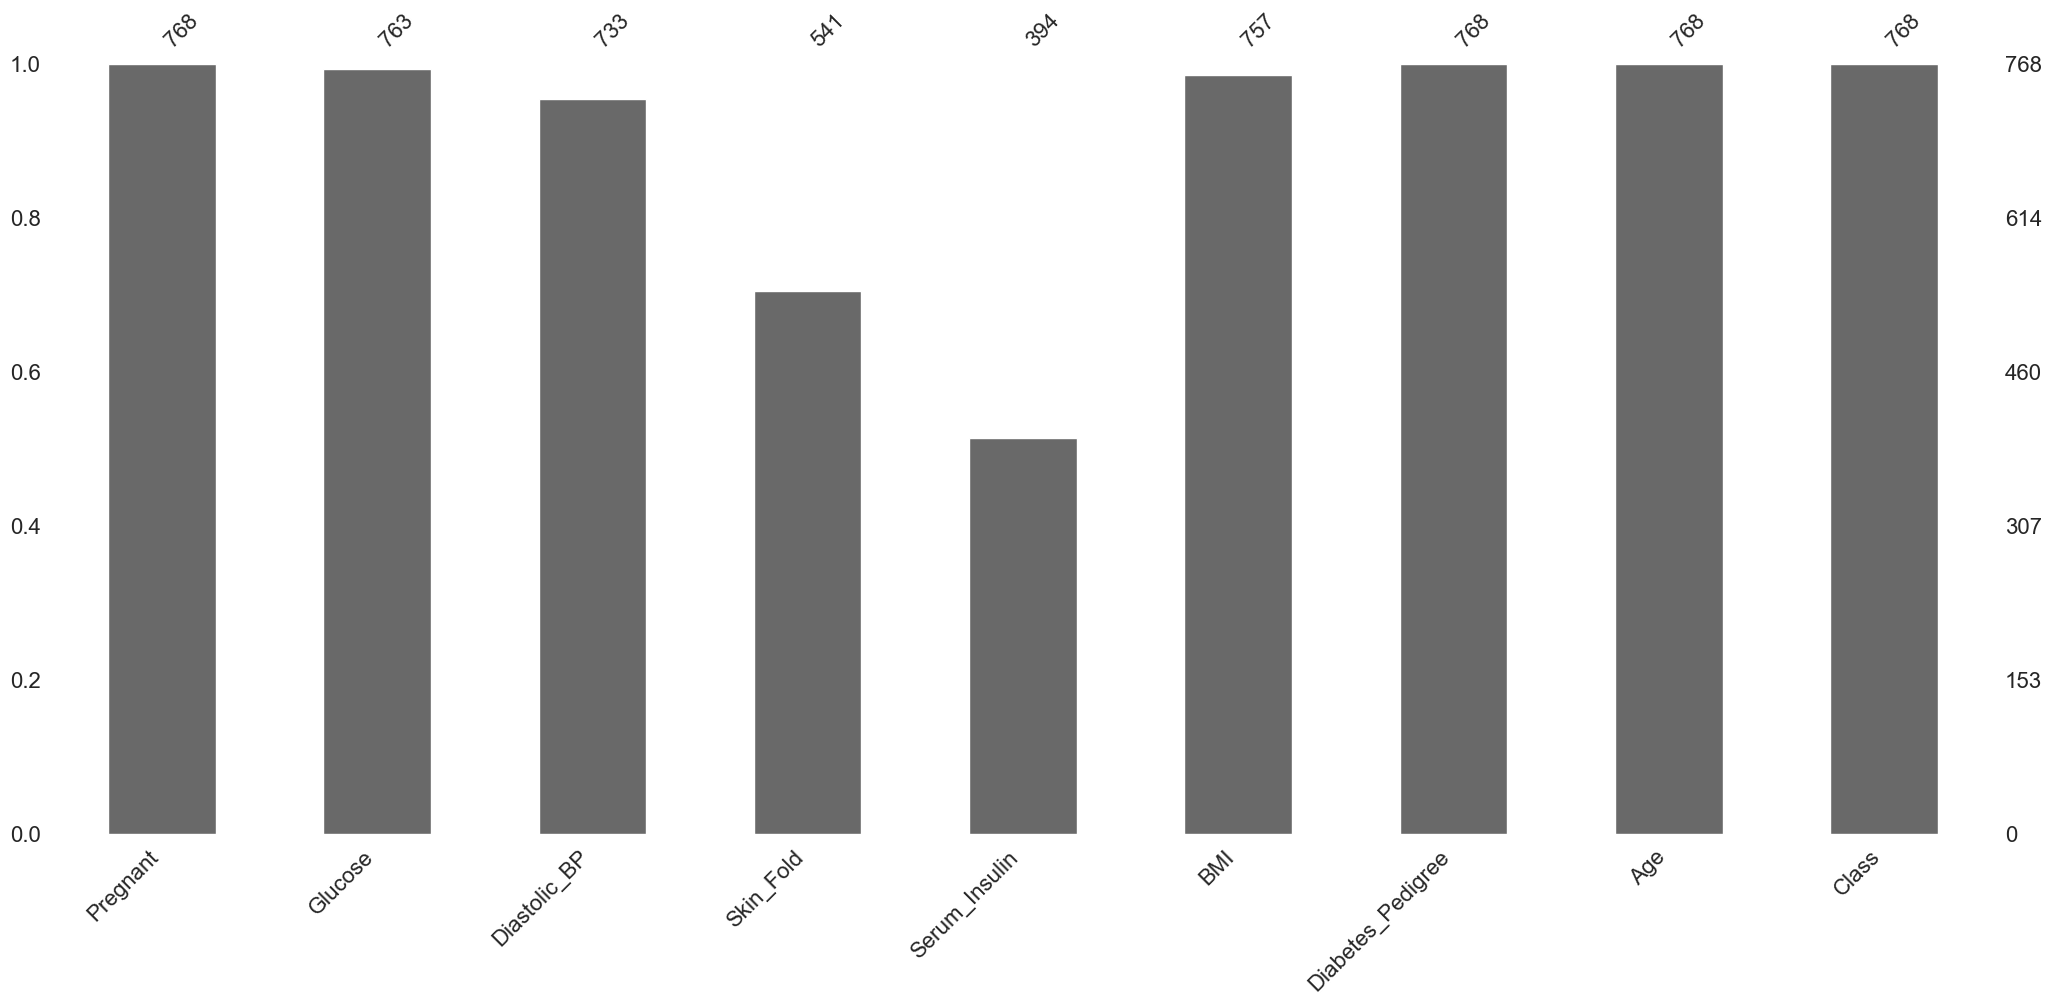

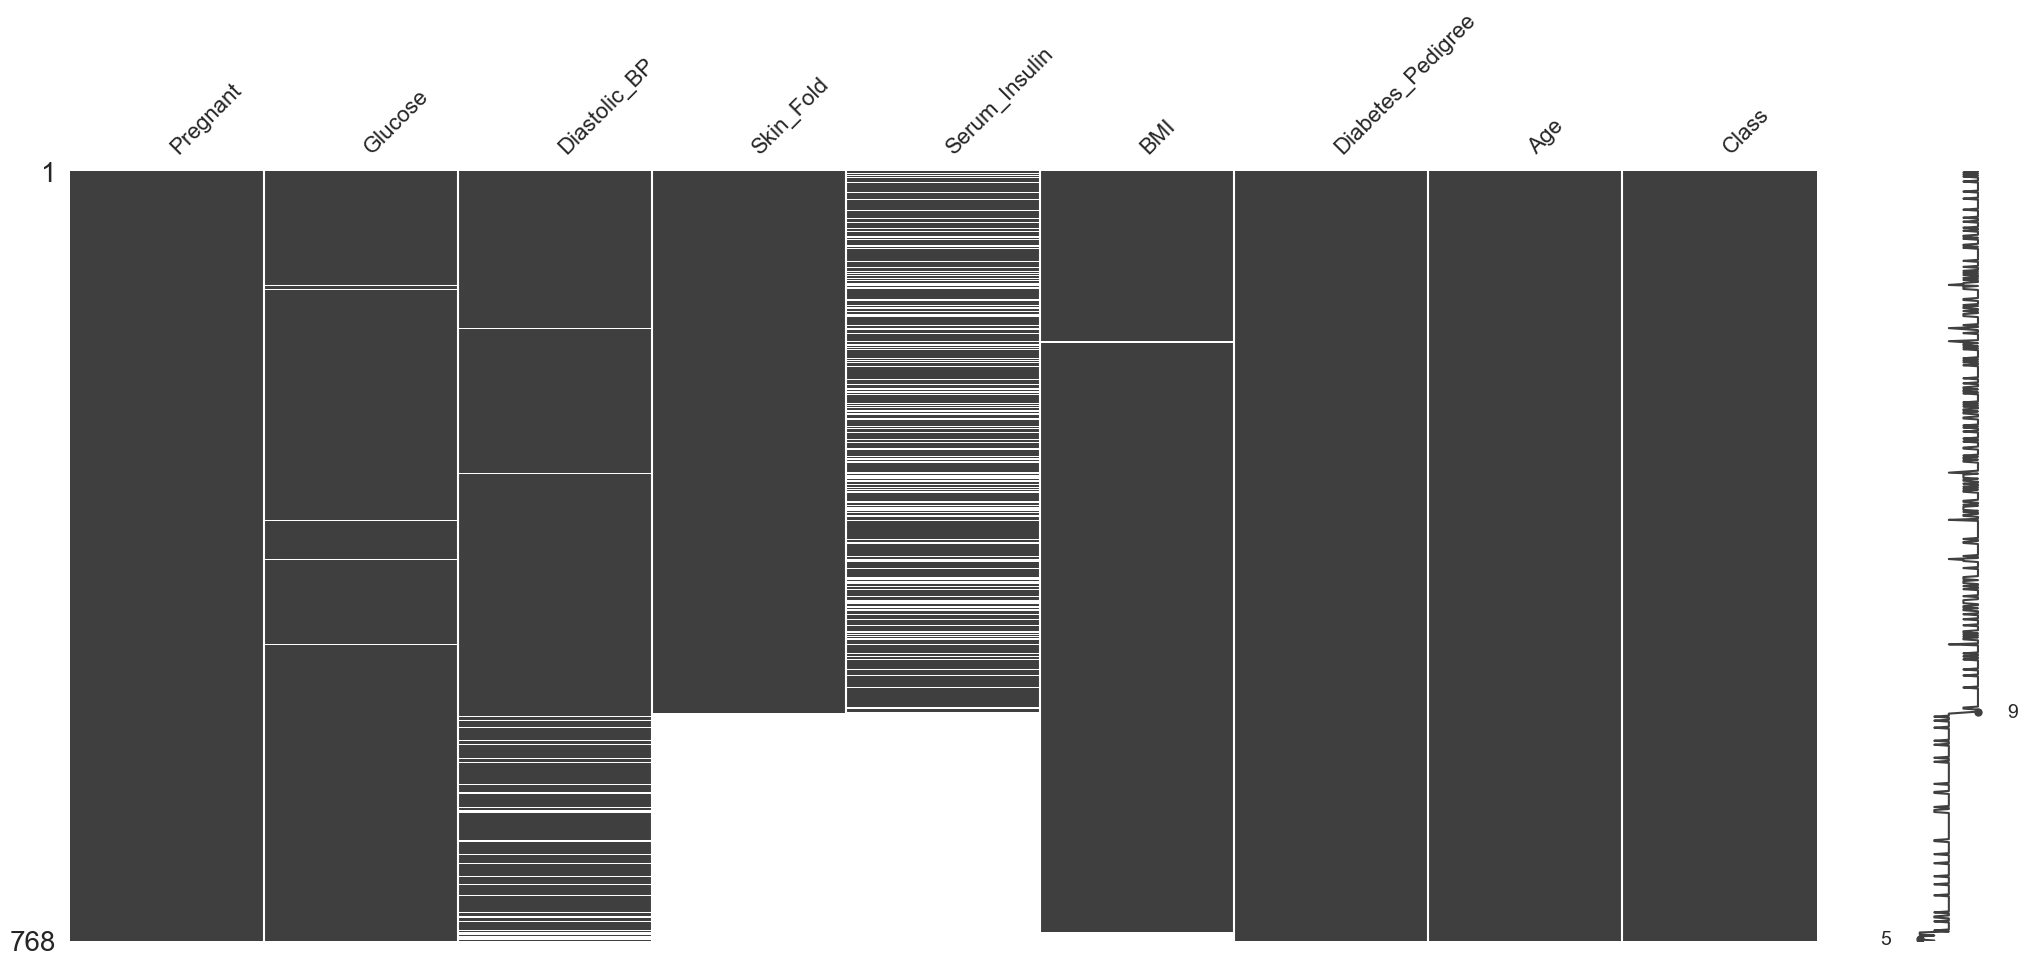

In [48]:
import missingno as msno
import matplotlib.pyplot as plt


msno.bar(df)  # 繪製缺失值的條形圖
plt.show()  # 顯示圖表


msno.matrix(df)  # 繪製缺失值的矩陣圖
plt.show()  # 顯示圖表


缺失值的發生是否為隨機，以及其背後的成因是什麼？不同變量之間的缺失值是否存在某種相關性？

通常，缺失值的發生可以分為三種情況：

- 完全隨機缺失（MCAR）：缺失值與其他變量之間沒有任何關聯。
- 隨機缺失（MAR）：缺失值與其他變量有關，但不是與缺失的變量存在直接的相關性。
- 非隨機缺失（MNAR）：缺失值之間存在相關性。

了解缺失值發生的原因以及它們之間的相關性對於處理缺失值至關重要。透過對DataFrame的matrix觀察，我們可以發現，Glucose（血糖）變量和BMI變量為完全隨機缺失，Diastolic_BP（舒張壓）變量為隨機缺失，而Skin_Fold（皮膚褶皺厚度）和Serum_Insulin（血清胰島素）兩個變量的缺失值之間存在相關性，因此它們屬於非隨機缺失。

為了更加直觀地觀察缺失值之間的關係，我們還可以利用missingno套件中的熱力圖和樹形圖進行可視化。

<Axes: >

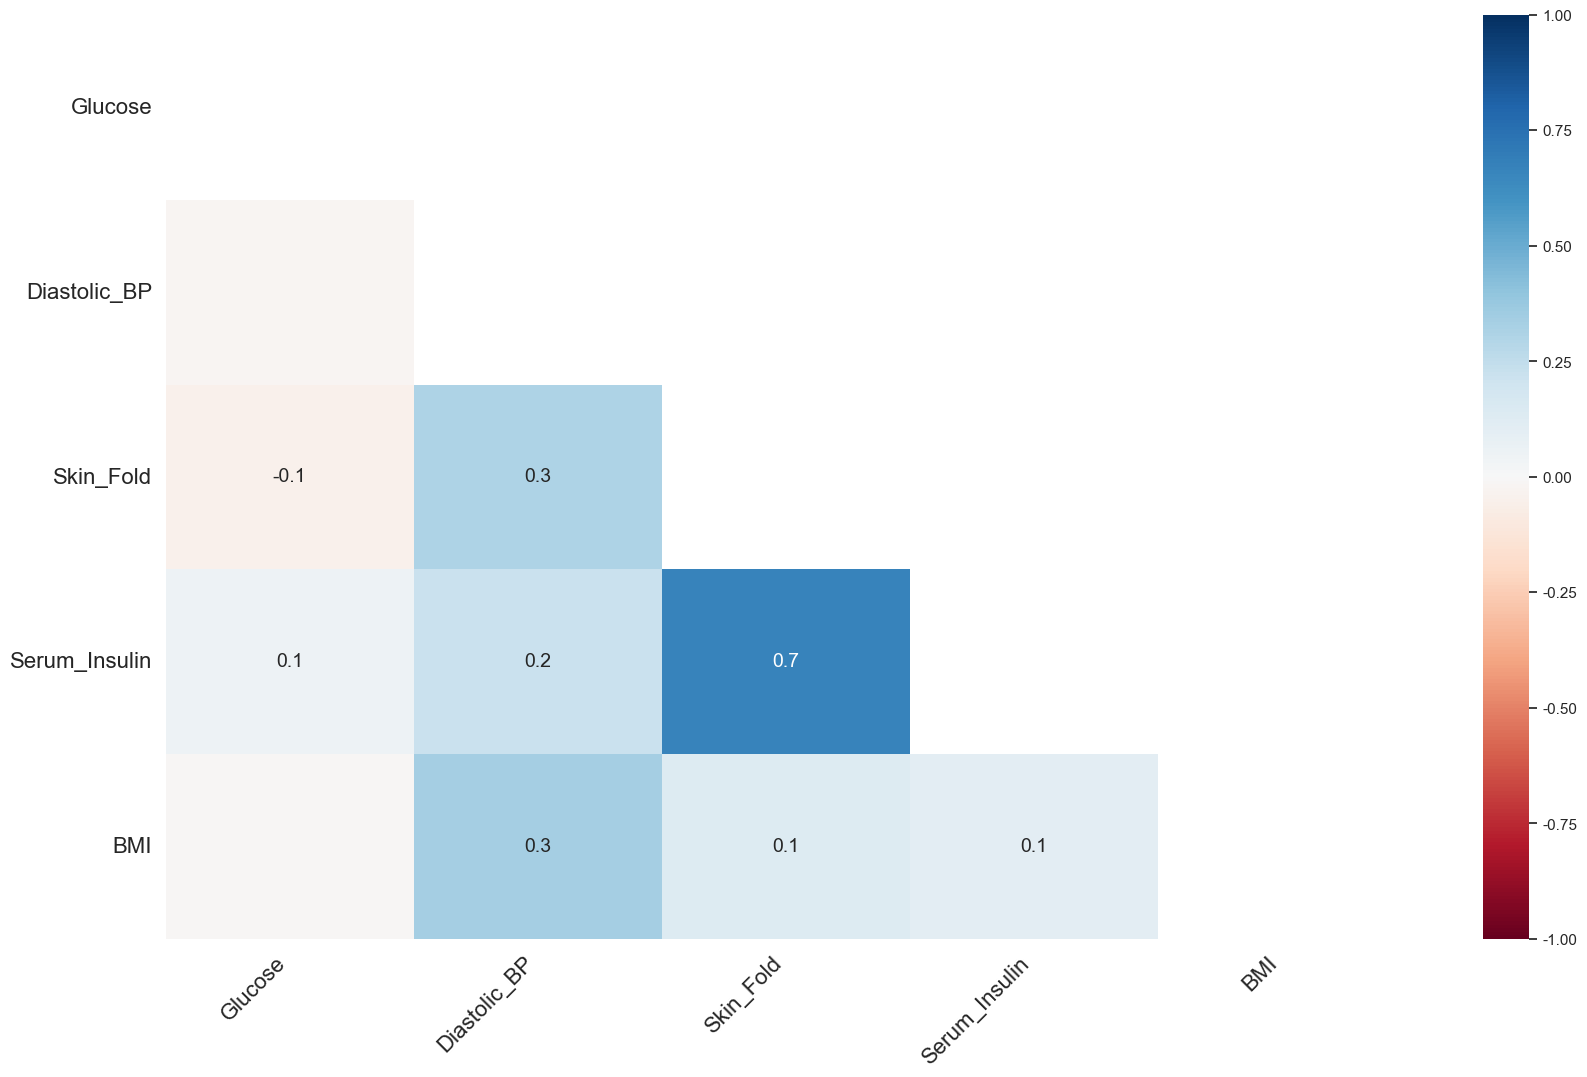

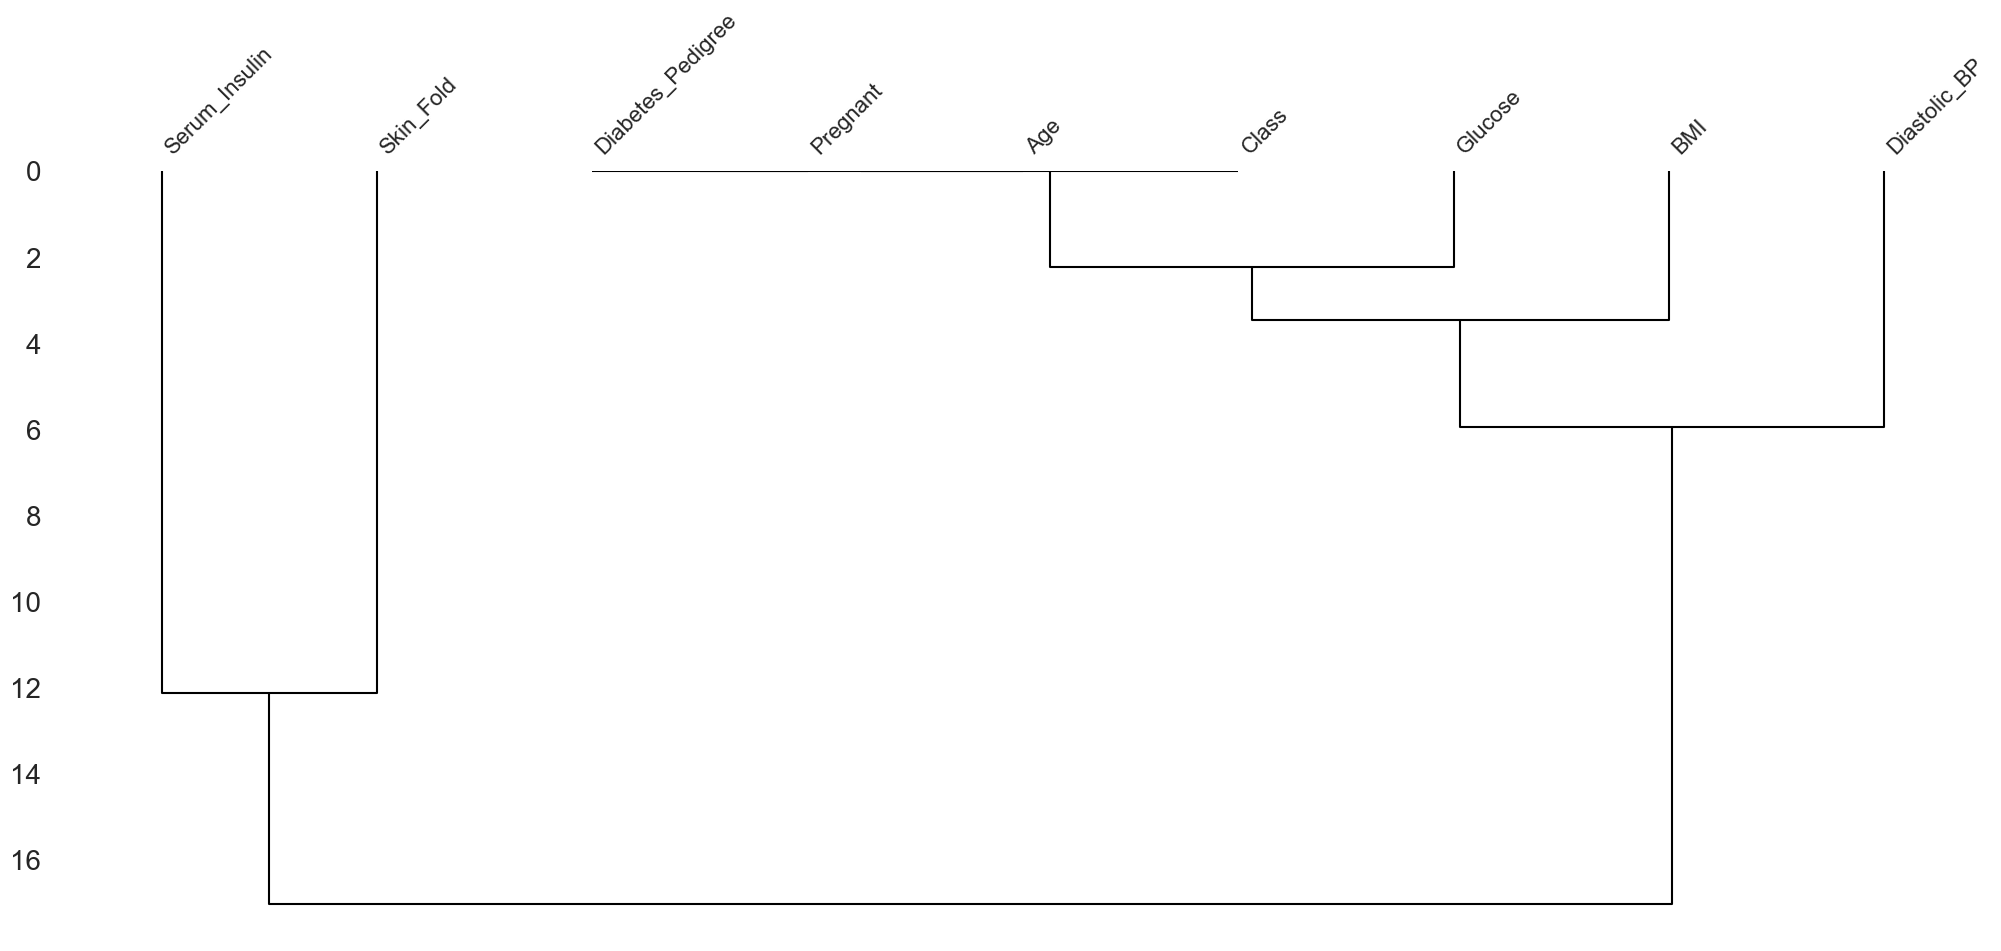

In [49]:
msno.heatmap(df)
msno.dendrogram(df)


透過這兩張圖，我們可以非常直觀地看到Skin_Fold與Serum_Insulin這兩個變量的缺失值存在強相關性。
縱軸（Y軸）在這裡表示的是聚類相似度的層級

## 合理刪除或填補缺失數據

### 合理刪除缺失數據
在分析完缺失值的情況之後，我們可以根據實際情形對缺失數據進行一些處理。對於缺失數據，一般的處理方法有兩種：

1. 刪除缺失數據；<br>
2. 填補缺失數據。<br>

對於完全隨機缺失（MCAR）的情形，一般處理方法就是直接刪除，其中刪除方式有兩種：

1. 成對刪除（pairwise deletion）；<br>
2. 列表刪除（listwise deletion）。<br>

這兩種刪除方式各有其優點和缺點。一般情況下推薦使用成對刪除方法，但當數據缺失量較小時，為了獲得更完整的分析結果，可以考慮使用列表刪除。

In [50]:
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,129.0,90.0,7.0,326.0,19.6,0.582,60,0
1,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1
2,1,90.0,68.0,8.0,NaN,24.5,1.138,36,0
3,1,109.0,60.0,8.0,182.0,25.4,0.947,21,0
4,1,73.0,50.0,10.0,NaN,23.0,0.248,21,0
...,...,...,...,...,...,...,...,...,...
763,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
764,10,115.0,NaN,NaN,NaN,NaN,0.261,30,1
765,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
766,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0


<Axes: >

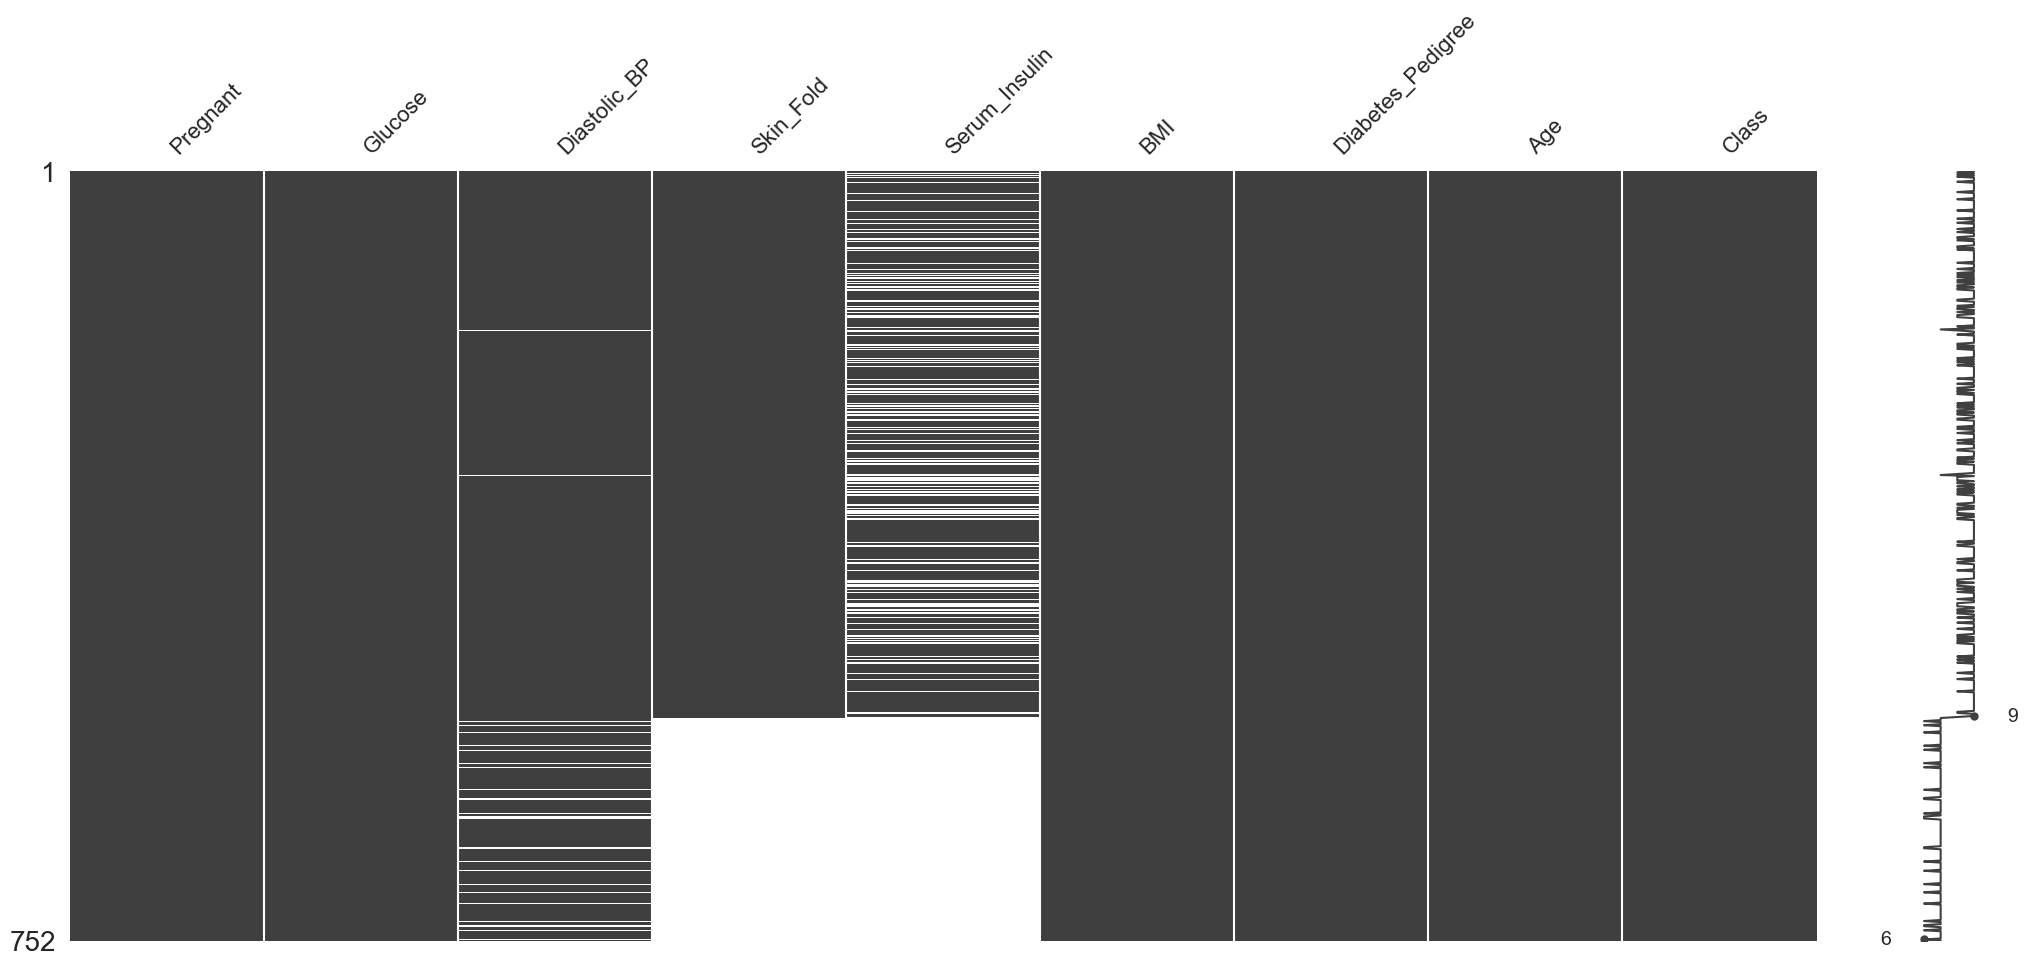

In [51]:
df.dropna(subset=["Glucose", 'BMI'], how='any', inplace=True)
msno.matrix(df)

## 填補缺失數據
在對完全隨機缺失的數據進行刪除操作之後，我們需要對那些因為其他原因缺失的數據進行填補操作。目前我們還有以下變量存在缺失數據：

`Diastolic_BP`<br>
`Skin_Fold`<br>
`Serum_Insulin`<br>

缺失數據填補一般有兩種方式。一般方式通常是為缺失數據填補平均數、中位數、眾數或者常數，<br>
高級填補方式中需要使用到機器學習的一些算法來進行填補，比如KNN、MICE等。<br>
使用哪種方式要根據不同的情況進行合理的選擇，需要對數據進行合理的填補又不能過度擬合模型。一般方式填補數據需要用到一個python包sklearn：<br>

In [52]:
from sklearn.impute import SimpleImputer


### 平均數補值

In [53]:
# https://ithelp.ithome.com.tw/articles/10221255
# 我這邊copy使用深拷貝，避免更動到原始資料，詳細參考上方連結

df_mean = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean')
df_mean.loc[:, :] = mean_imputer.fit_transform(df_mean)


### 中位數補值

In [54]:
df_median = df.copy(deep=True)
median_imputer = SimpleImputer(strategy='median')
df_median.loc[:, :] = mean_imputer.fit_transform(df_median)


### 眾數補值

In [55]:
df_mode = df.copy(deep=True)
mode_imputer = SimpleImputer(strategy='mode')
df_mode.loc[:, :] = mean_imputer.fit_transform(df_mode)


### 常數補值

In [56]:
df_constant = df.copy(deep=True)
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
df_constant.loc[:, :] = constant_imputer.fit_transform(df_constant)


<Axes: >

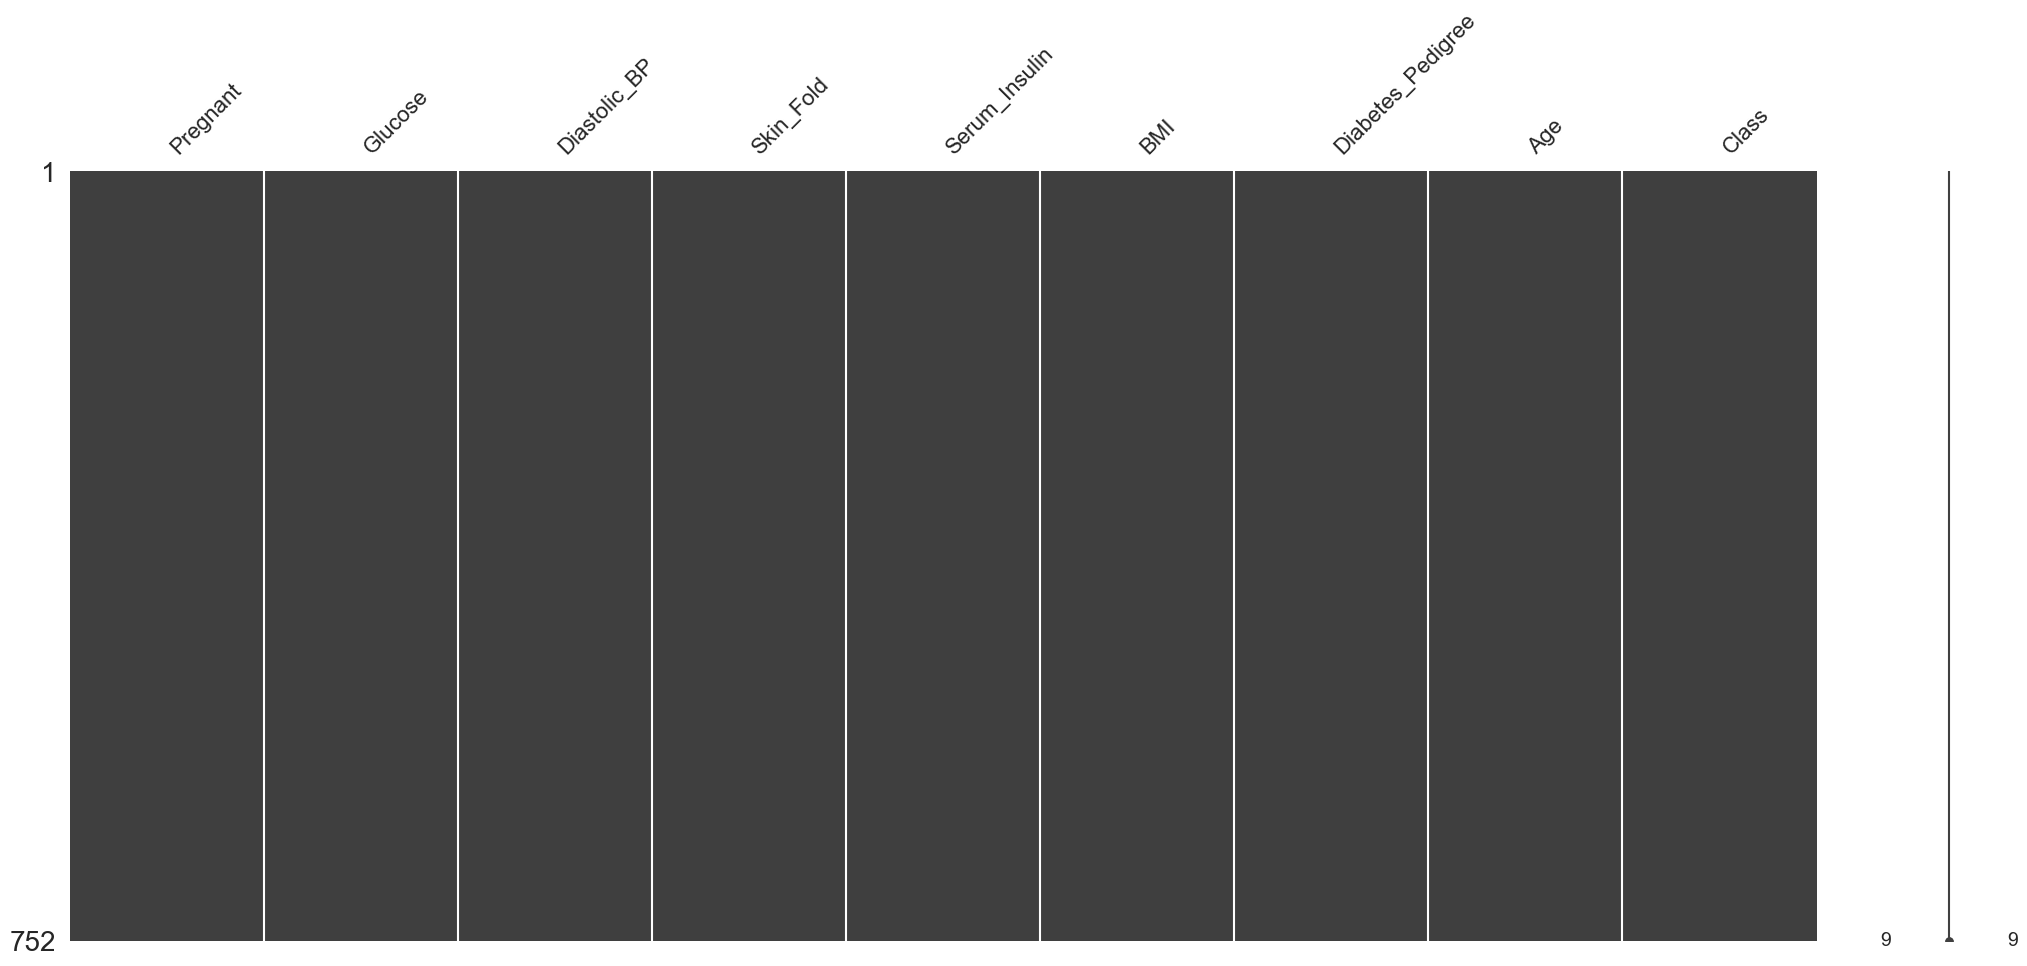

In [57]:
df_mode

msno.matrix(df_mode)

## 補值結果視覺化

<Axes: title={'center': 'Mean Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

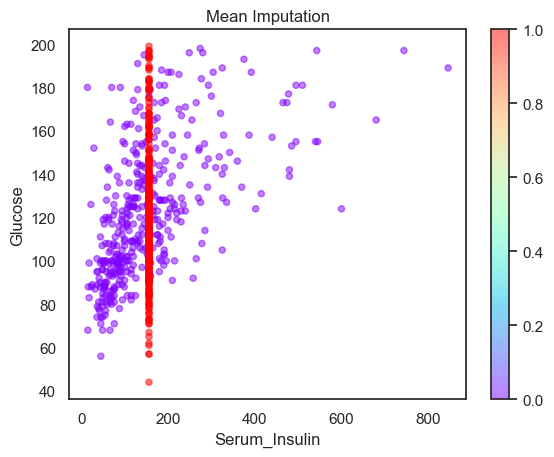

In [58]:
nullity = df['Serum_Insulin'].isnull()+df['Glucose'].isnull()
df_mean.plot(x='Serum_Insulin', y='Glucose', kind='scatter', alpha=0.5, 
c=nullity, cmap='rainbow', title='Mean Imputation')

從圖中的紫色點可以觀察到，Serum_Insulin變量和Glucose變量存在一定的正相關性，但是填補的數據（紅色點）並沒有呈現應有的相關性，因此該填補方式可能不太合理。

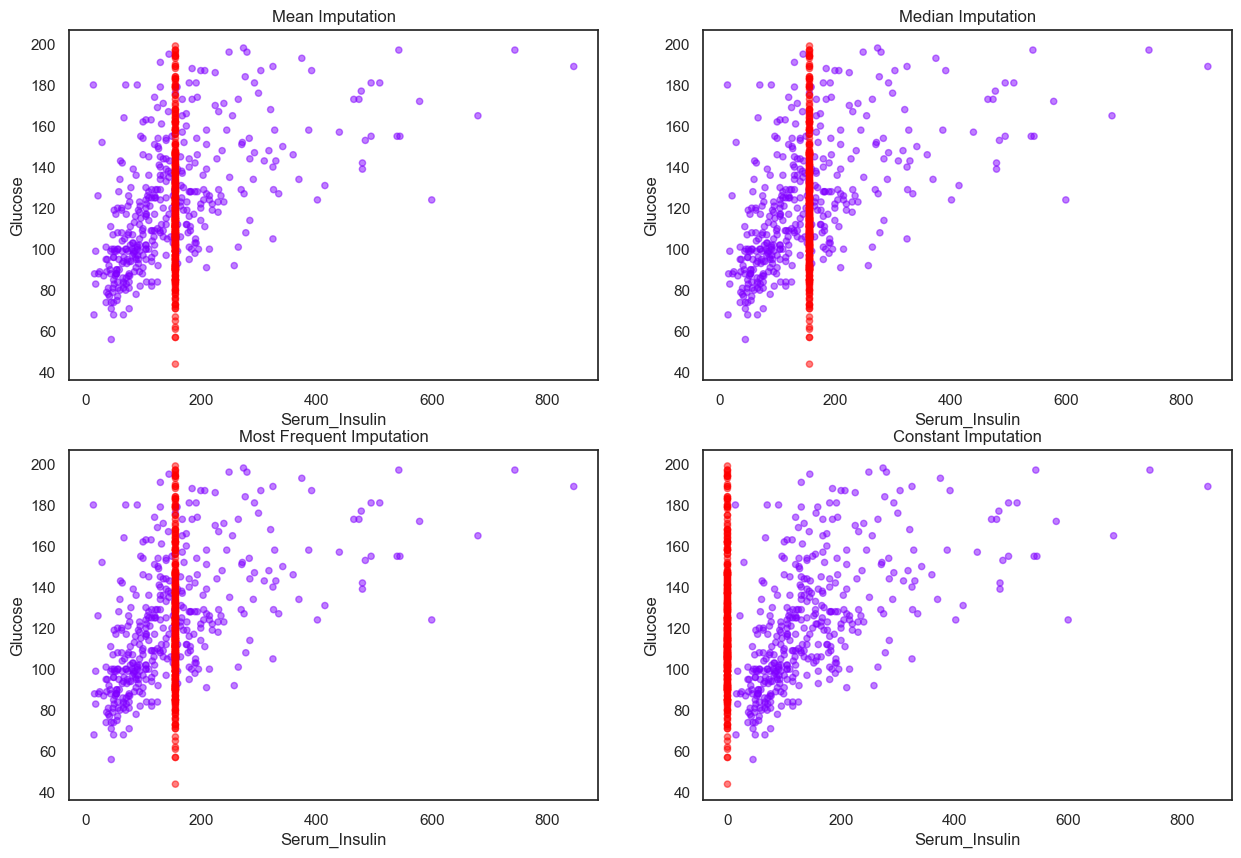

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

nullity = df['Serum_Insulin'].isnull()+df['Glucose'].isnull()
imputations = {'Mean Imputation': df_mean, 
               'Median Imputation': df_median,
               'Most Frequent Imputation': df_mode,
               'Constant Imputation': df_constant}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)
    



出現了與平均數填補方式類似的情況。為了更好地提升填補效果，
我們改使用更高級的填補方法，例如KNN或者MICE。

## 進階填補方法
KNN是K-Nearest Neighbor（最近鄰居）的縮寫，它的運作原理基於選擇與缺失數據點最鄰近的K個完整數據點，進而採用這K個點的數據平均值來填補該缺失數據。

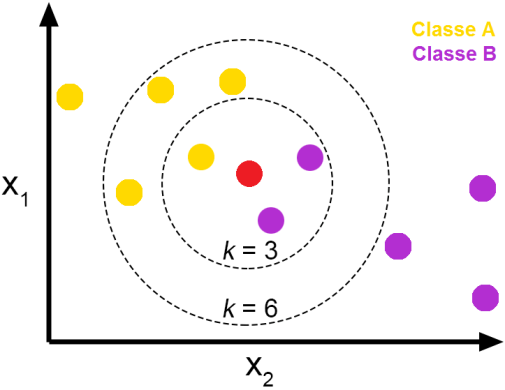

<Axes: title={'center': 'Mean Imputation'}, xlabel='Serum_Insulin', ylabel='Glucose'>

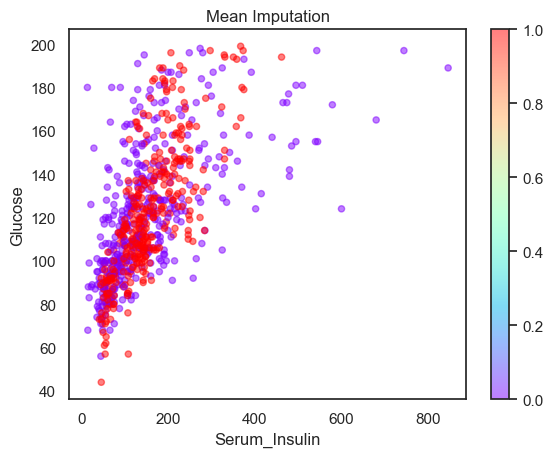

In [60]:
from sklearn.impute import KNNImputer
import pandas as pd

# 假设df是我们的DataFrame，并且已经加载到pandas中
# 这里我们创建一个KNNImputer实例
imputer = KNNImputer(n_neighbors=5)  # 通过n_neighbors参数设置最近邻居的数量

# 使用fit_transform对df进行拟合和转换，来填充缺失值
df_knn = imputer.fit_transform(df)

# 将填充后的数据转换回DataFrame格式
df_knn = pd.DataFrame(df_knn, columns=df.columns)


nullity = df['Serum_Insulin'].isnull()+df['Glucose'].isnull()
df_knn.plot(x='Serum_Insulin', y='Glucose', kind='scatter', alpha=0.5, 
c=nullity, cmap='rainbow', title='Mean Imputation')


面對這麼多的填補方法，該如何選擇呢？哪一種更好？實際上，對於這個問題並沒有標準答案，我們需要根據實際情況來選擇最合適的填補方法。此時，我們就進入了處理缺失值的最後一個步驟——比較和評估填補缺失數據後的表現。

## 比較評估表現
數據填補的終極目標是為了提升模型的表現，因此在進行缺失數據填補時，這一點是首要考慮的因素。通常情況下，使用機器學習模型來填補的數據可能會有更好的表現，我們需要選擇表現最佳的填補情況。在評估表現的過程中，使用密度圖可以非常直觀地展示數據的分布情況，同時也是檢查填補偏差的一個很好的方法。接下來，我們將利用線性模型來驗證填補後的數據df與移除所有缺失值的數據df_cc各自的表現：

線性 ordinary least square 擬合模型

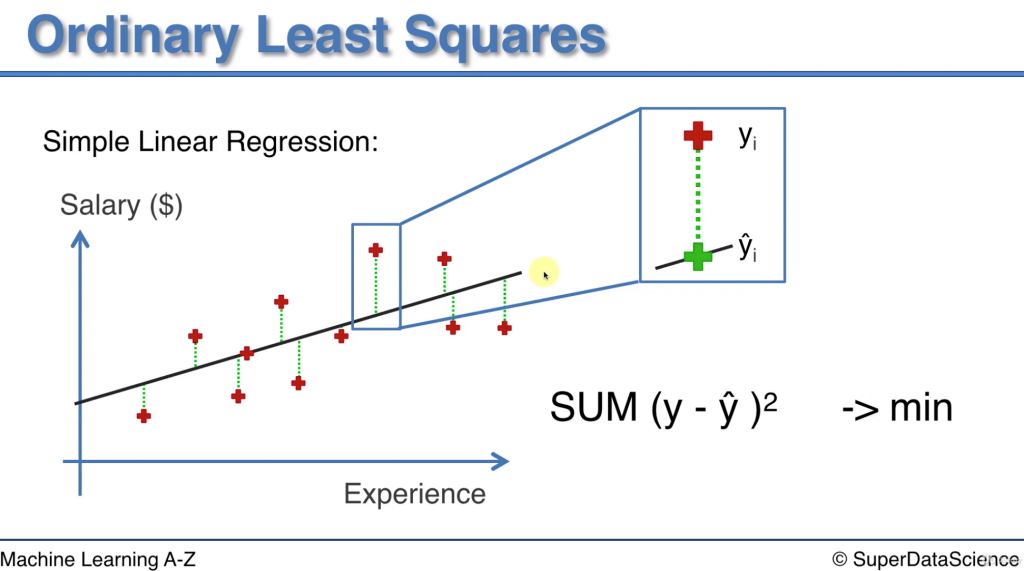

## 完整數據df_cc vs. KNN填補後的數據df_imputed vs. mean填補後的數據df_mean

In [61]:
import statsmodels.api as sm


# 去除df中所有缺失值，獲得完整數據df_cc > baseline model
df_cc = df.dropna(how='any')
# 剔除 Class 欄位
X = sm.add_constant(df_cc.iloc[:, :-1])
#取出'Class'預測結果
y = df_cc['Class']
#線性 ordinary least square 擬合模型
lm = sm.OLS(y, X).fit()
print(lm.summary())

'''
R-squared：也稱為決定係數，它衡量了模型能夠解釋的變異性的比例。R^2的值在0到1之間，
值越高表示模型解釋的變異性越多，即模型的擬合度越好。然而，R^2有一個缺點，
那就是當你向模型中添加更多的變量時，R^2只會增加或保持不變，即使這些變量對模型沒有實質性貢獻。

Adjusted R-squared：調整後的R^2考慮了模型中變量的數量，對於每增加一個變量，它會對R^2進行調整。
如果新增加的變量對模型的解釋能力有貢獻，調整後的R^2會增加；如果新增加的變量沒有效益，甚至有害，調整後的R^2會下降。
因此，調整後的R^2通常較R^2更可靠，尤其是當模型中包含多個解釋變量時。
'''


                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.65e-31
Time:                        17:13:55   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1027      0.14

'\nR-squared：也稱為決定係數，它衡量了模型能夠解釋的變異性的比例。R^2的值在0到1之間，\n值越高表示模型解釋的變異性越多，即模型的擬合度越好。然而，R^2有一個缺點，\n那就是當你向模型中添加更多的變量時，R^2只會增加或保持不變，即使這些變量對模型沒有實質性貢獻。\n\nAdjusted R-squared：調整後的R^2考慮了模型中變量的數量，對於每增加一個變量，它會對R^2進行調整。\n如果新增加的變量對模型的解釋能力有貢獻，調整後的R^2會增加；如果新增加的變量沒有效益，甚至有害，調整後的R^2會下降。\n因此，調整後的R^2通常較R^2更可靠，尤其是當模型中包含多個解釋變量時。\n'

In [62]:
print('\nAdjusted R-squared: ', lm.rsquared_adj)


Adjusted R-squared:  0.33210805003287613


In [63]:
print('\nCoefficcients:\n', lm.params)


Coefficcients:
 const               -1.102677
Pregnant             0.012953
Glucose              0.006409
Diastolic_BP         0.000055
Skin_Fold            0.001678
Serum_Insulin       -0.000123
BMI                  0.009325
Diabetes_Pedigree    0.157192
Age                  0.005878
dtype: float64


In [64]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 758
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           752 non-null    int64  
 1   Glucose            752 non-null    float64
 2   Diastolic_BP       752 non-null    float64
 3   Skin_Fold          752 non-null    float64
 4   Serum_Insulin      752 non-null    float64
 5   BMI                752 non-null    float64
 6   Diabetes_Pedigree  752 non-null    float64
 7   Age                752 non-null    int64  
 8   Class              752 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 58.8 KB


In [65]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           752 non-null    float64
 1   Glucose            752 non-null    float64
 2   Diastolic_BP       752 non-null    float64
 3   Skin_Fold          752 non-null    float64
 4   Serum_Insulin      752 non-null    float64
 5   BMI                752 non-null    float64
 6   Diabetes_Pedigree  752 non-null    float64
 7   Age                752 non-null    float64
 8   Class              752 non-null    float64
dtypes: float64(9)
memory usage: 53.0 KB


In [66]:
# 平均數補值
X = sm.add_constant(df_mean.iloc[:, :-1])
y = df['Class']
lm_mean = sm.OLS(y, X).fit()
print(lm_mean.summary())

# KNN 補值
X = sm.add_constant(df_knn.iloc[:, :-1])
y = df_knn['Class']
lm_KNN = sm.OLS(y, X).fit()
print(lm_KNN.summary())


                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     43.64
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.07e-57
Time:                        17:13:55   Log-Likelihood:                -366.04
No. Observations:                 752   AIC:                             750.1
Df Residuals:                     743   BIC:                             791.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0126      0.10

## rsquared_adj 越高越好，評估模型的好壞

In [67]:
r_squared = pd.DataFrame({'Complete Case': lm.rsquared_adj, 
                          'Mean Imputation': lm_mean.rsquared_adj, 
                          'KNN Imputation': lm_KNN.rsquared_adj, 
                          }, 
                         index=['Adj. R-squared'])
print(r_squared)

                Complete Case  Mean Imputation  KNN Imputation
Adj. R-squared       0.332108         0.312339        0.313641


In [68]:
coeff = pd.DataFrame({'Complete Case': lm.params, 
                      'Mean Imputation': lm_mean.params, 
                      'KNN Imputation': lm_KNN.params, 
                      })
print(coeff)

                   Complete Case  Mean Imputation  KNN Imputation
const                  -1.102677        -1.012616       -1.022393
Pregnant                0.012953         0.019565        0.019100
Glucose                 0.006409         0.006501        0.006688
Diastolic_BP            0.000055        -0.001212       -0.001414
Skin_Fold               0.001678         0.000100        0.001725
Serum_Insulin          -0.000123        -0.000100       -0.000172
BMI                     0.009325         0.014151        0.013052
Diabetes_Pedigree       0.157192         0.137044        0.137234
Age                     0.005878         0.002161        0.002241


In [69]:
r_squares = {
             'Mean Imputation': lm_mean.rsquared_adj, 
             'KNN Imputation': lm_KNN.rsquared_adj, 
             }
# 选取最佳R-square
best_imputation = max(r_squares, key=r_squares.get)
print("最佳補值方式: ", best_imputation)

最佳補值方式:  KNN Imputation


根據調整後的R平方值得出的結論是，使用KNN填補方法得到的模型擬合度最佳。同時，我們還可以通過繪製密度圖來觀察填補後的數據與移除所有缺失數據後的完整數據集的分佈情況，這樣可以直觀地看出哪種填補方式的分佈與完整數據集的分佈最相近，從而避免選擇的填補方式存在過大的偏差。

## 各種補值方式在 Skin_Fold 補值結果比較

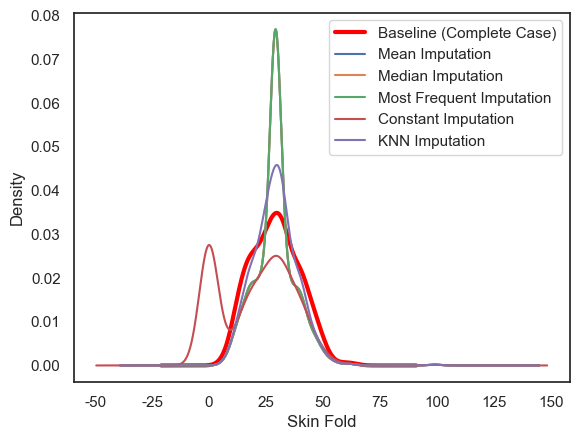

In [70]:
df_cc['Skin_Fold'].plot(kind='kde', c='red', linewidth=3)
df_mean['Skin_Fold'].plot(kind='kde')
df_median['Skin_Fold'].plot(kind='kde')
df_mode['Skin_Fold'].plot(kind='kde')
df_constant['Skin_Fold'].plot(kind='kde')
df_knn['Skin_Fold'].plot(kind='kde')

labels = ['Baseline (Complete Case)', 'Mean Imputation', 'Median Imputation', 'Most Frequent Imputation','Constant Imputation','KNN Imputation']

plt.legend(labels)
plt.xlabel('Skin Fold')
plt.show()

## 各種補值方式在 Serum_Insulin 補值結果比較

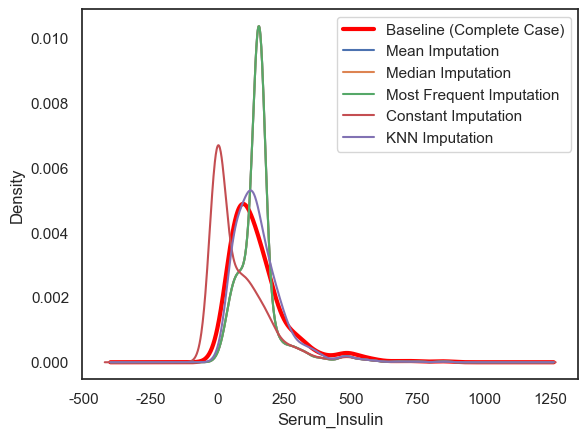

In [71]:
df_cc['Serum_Insulin'].plot(kind='kde', c='red', linewidth=3)
df_mean['Serum_Insulin'].plot(kind='kde')
df_median['Serum_Insulin'].plot(kind='kde')
df_mode['Serum_Insulin'].plot(kind='kde')
df_constant['Serum_Insulin'].plot(kind='kde')
df_knn['Serum_Insulin'].plot(kind='kde')

labels = ['Baseline (Complete Case)', 'Mean Imputation', 'Median Imputation', 'Most Frequent Imputation','Constant Imputation','KNN Imputation']

plt.legend(labels)
plt.xlabel('Serum_Insulin')
plt.show()

## 預測 target 的缺失值處理 

有時我們的數據中會出現一些分類變量數據的缺失情況，需要進行插補。分類變量的缺失數據插補相對較為複雜，因為這類數據通常是以字符串形式出現。因此，我們通常需要先進行編碼，例如使用0、1來代表不同的分類，然後再採用一些方法對缺失數據進行插補。在這個例子中，我不打算引入新的資料集，因此將直接修改原有的diabetes資料集中的‘Class’列，用於進行插補演示。








### 手動建立一個有缺失值的 DataFrame 進行 demo

In [72]:
# 修改既有資料
import pandas as pd
import numpy as np

df_origin = pd.read_csv('data/pima-indians-diabetes.csv', na_values='.')

# 分別將 "class" 為1和ˇ0的標記為患病和健康，並創建新的行"outcome"
df_origin.loc[df_origin['Class'] == 1, 'Outcome'] = 'diabetes'
df_origin.loc[df_origin['Class'] == 0, 'Outcome'] = 'healthy'

# 將前50筆資料的"outcome"設為缺失，我們要處理的欄位 (我自己定義的)

df = df_origin.copy(deep=True)
df.loc[:49,'Outcome'] = np.nan


In [73]:
df_origin

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Outcome
0,6,129.0,90.0,7.0,326.0,19.6,0.582,60,0,healthy
1,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1,diabetes
2,1,90.0,68.0,8.0,NaN,24.5,1.138,36,0,healthy
3,1,109.0,60.0,8.0,182.0,25.4,0.947,21,0,healthy
4,1,73.0,50.0,10.0,NaN,23.0,0.248,21,0,healthy
...,...,...,...,...,...,...,...,...,...,...
763,0,94.0,NaN,NaN,NaN,0.0,0.256,25,0,healthy
764,10,115.0,NaN,NaN,NaN,0.0,0.261,30,1,diabetes
765,2,84.0,NaN,NaN,NaN,0.0,0.304,21,0,healthy
766,7,105.0,NaN,NaN,NaN,0.0,0.305,24,0,healthy


### 針對輸出Y 進行字典編碼

In [74]:
label_mapping = {
    'healthy': 0,
    'diabetes': 1,
}

df['Outcome'] = df['Outcome'].map(label_mapping)
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Outcome
0,6,129.0,90.0,7.0,326.0,19.6,0.582,60,0,NaN
1,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1,NaN
2,1,90.0,68.0,8.0,NaN,24.5,1.138,36,0,NaN
3,1,109.0,60.0,8.0,182.0,25.4,0.947,21,0,NaN
4,1,73.0,50.0,10.0,NaN,23.0,0.248,21,0,NaN
...,...,...,...,...,...,...,...,...,...,...
763,0,94.0,NaN,NaN,NaN,0.0,0.256,25,0,0.0
764,10,115.0,NaN,NaN,NaN,0.0,0.261,30,1,1.0
765,2,84.0,NaN,NaN,NaN,0.0,0.304,21,0,0.0
766,7,105.0,NaN,NaN,NaN,0.0,0.305,24,0,0.0


### 利用 KNN 將 NA 值補上

In [75]:
#建立KNN插補器
KNN_imputer = KNNImputer(n_neighbors=5)  

#插補缺失資料並將其保留為整數
df.loc[:,:] = np.round(KNN_imputer.fit_transform(df))

df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Outcome
0,6,129.0,90.0,7.0,326.0,20.0,1.0,60,0,0.0
1,12,92.0,62.0,7.0,258.0,28.0,1.0,44,1,0.0
2,1,90.0,68.0,8.0,57.0,24.0,1.0,36,0,0.0
3,1,109.0,60.0,8.0,182.0,25.0,1.0,21,0,0.0
4,1,73.0,50.0,10.0,67.0,23.0,0.0,21,0,0.0
...,...,...,...,...,...,...,...,...,...,...
763,0,94.0,69.0,20.0,51.0,0.0,0.0,25,0,0.0
764,10,115.0,71.0,23.0,107.0,0.0,0.0,30,1,1.0
765,2,84.0,66.0,20.0,69.0,0.0,0.0,21,0,0.0
766,7,105.0,69.0,21.0,77.0,0.0,0.0,24,0,0.0


### 針對 KNN 補值後的 Y 進行逆轉換回原本的標籤 

In [76]:
label_mapping = {
    0:'healthy',
    1:'diabetes',
}

df['Outcome'] = df['Outcome'].map(label_mapping)
df

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Outcome
0,6,129.0,90.0,7.0,326.0,20.0,1.0,60,0,healthy
1,12,92.0,62.0,7.0,258.0,28.0,1.0,44,1,healthy
2,1,90.0,68.0,8.0,57.0,24.0,1.0,36,0,healthy
3,1,109.0,60.0,8.0,182.0,25.0,1.0,21,0,healthy
4,1,73.0,50.0,10.0,67.0,23.0,0.0,21,0,healthy
...,...,...,...,...,...,...,...,...,...,...
763,0,94.0,69.0,20.0,51.0,0.0,0.0,25,0,healthy
764,10,115.0,71.0,23.0,107.0,0.0,0.0,30,1,diabetes
765,2,84.0,66.0,20.0,69.0,0.0,0.0,21,0,healthy
766,7,105.0,69.0,21.0,77.0,0.0,0.0,24,0,healthy


### 確認一下 KNN 插補資料跟'Class'真實資料不符的個數

In [77]:
df_exp = df[:51]

error1 = df_exp[(df_exp[ 'Class' ] == 1 ) & (df_exp[ 'Outcome' ] == 'healthy' )]
error2 = df_exp[(df_exp[ 'Class' ] == 0 ) & (df_exp[ 'Outcome' ] == 'diabetes' )]

total = error1 + error2

print("不正確個數", len(total))

不正確個數 10


## 時間序列插值與處理

In [78]:
import pandas as pd
df = pd.read_csv( 'data/air-quality.csv' , parse_dates=[ 'Date' ], index_col= 'Date' )
df.head()


,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1976-05-01 to 1976-09-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   116 non-null    float64
 1   Solar   146 non-null    float64
 2   Wind    153 non-null    float64
 3   Temp    153 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.0 KB


In [80]:
#查看各變數缺失值的數量
df.isnull().sum()


Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [81]:
#看各變數缺失值所佔比例
df.isnull().mean() * 100

Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64

在處理時間序列資料中的缺漏數據時，基本上有兩種主要的策略。首先，我們會採用 .fillna() 方法進行處理；接著，將運用 .interpolate() 方法來填補資料中的空缺。此外，我們將透過視覺化的手段來評估這兩種方法的效果，從而選擇最適合的填補策略。


## .fillna() 方法
提供了兩種數據填補的選項，包括前向填補和後向填補。要選擇特定的填補方式，需要在 .fillna() 函數中調整 method 參數：

- 使用 'ffill' 或 'pad' 進行前向填補，(記憶: 向前看向未來)
- 使用 'bfill' 或 'backwardfill' 進行後向填補 (記憶: 回憶過去)

前向填補（ffill）即是指用缺失數據前方最近的一個非缺失值來填充該缺失值。相對地，後向填補（bfill）則是利用缺失數據後方最近的一個非缺失值來進行填充。

接下來，讓我們深入探討前向填補和後向填補的效果及它們之間的差異。

In [82]:
df['Ozone'][ 30 : 40 ]


Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64

In [83]:
df.fillna(method= 'ffill' )

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_65580\1712038025.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= 'ffill' )


,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,18.0,313.0,14.3,56
...,...,...,...,...
1976-09-26,30.0,193.0,6.9,70
1976-09-27,30.0,145.0,13.2,77
1976-09-28,14.0,191.0,14.3,75


In [84]:
df.fillna(method= 'bfill' )

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_65580\102231537.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= 'bfill' )


,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,28.0,299.0,14.3,56
...,...,...,...,...
1976-09-26,30.0,193.0,6.9,70
1976-09-27,14.0,145.0,13.2,77
1976-09-28,14.0,191.0,14.3,75


## 視覺化比較

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_65580\2649172248.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_imp = df.fillna(method='ffill')
C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_65580\2649172248.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfill_imp = df.fillna(method='bfill')


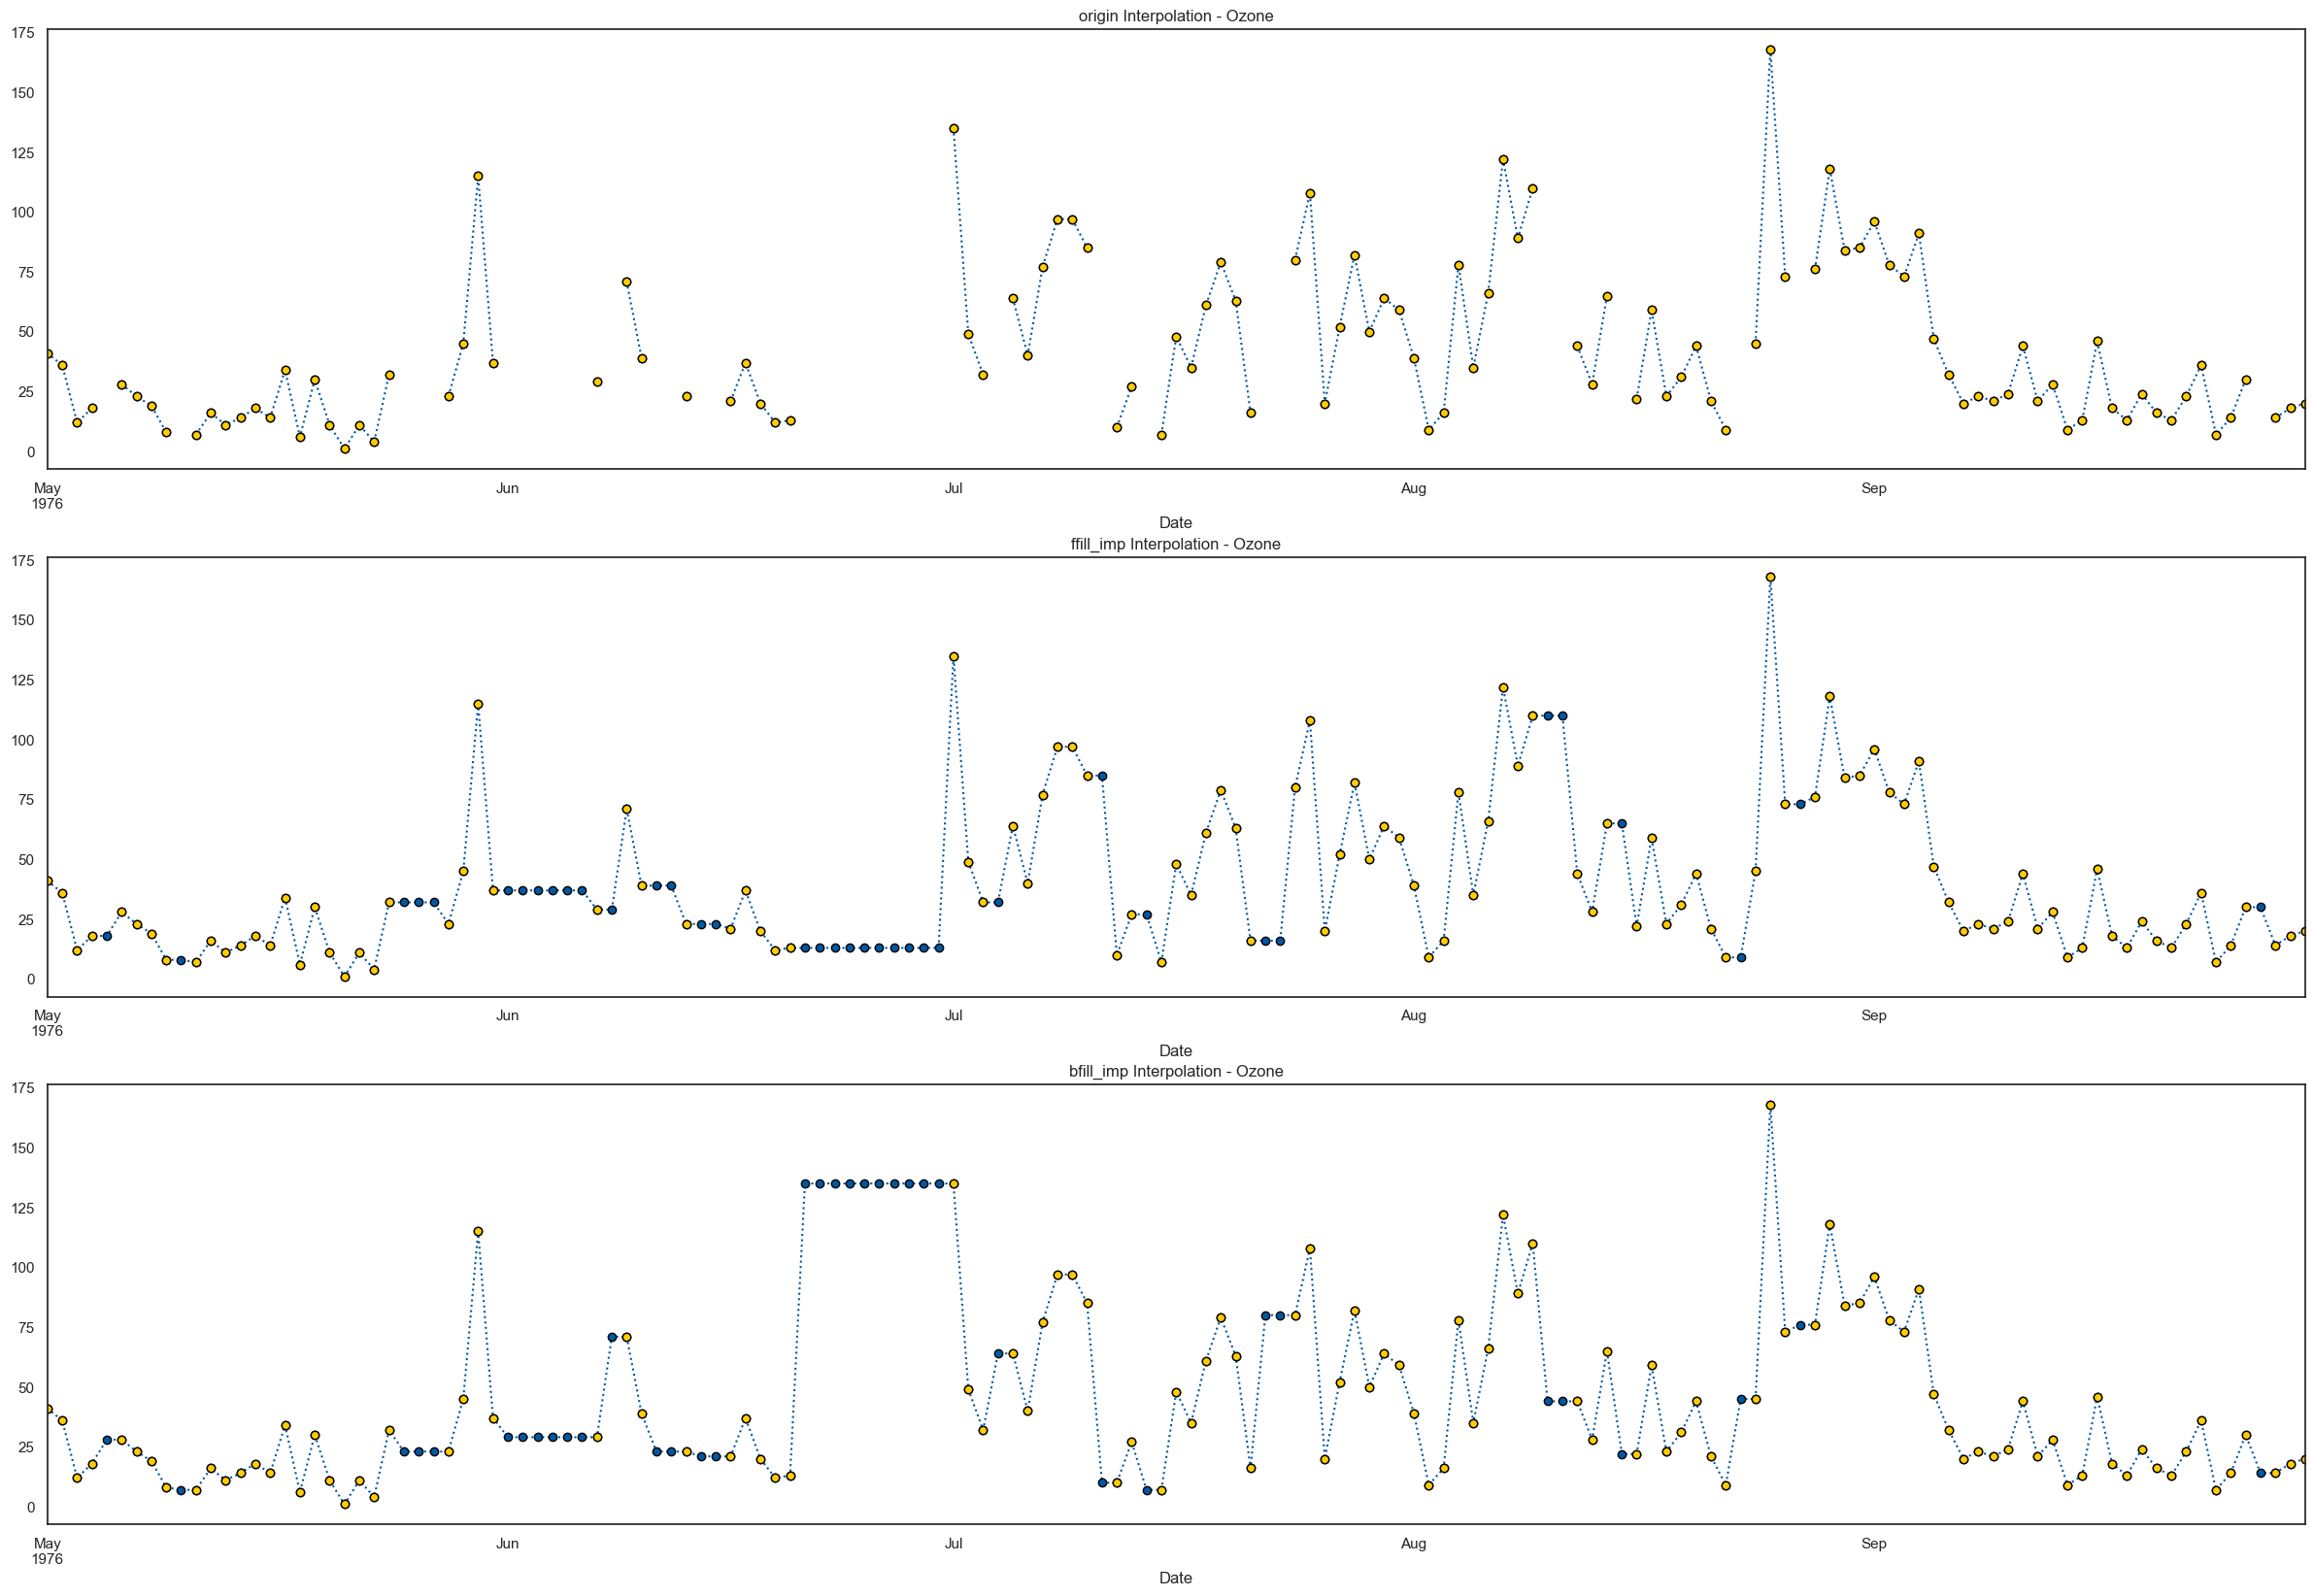

In [85]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(30, 20))

ffill_imp = df.fillna(method='ffill')
bfill_imp = df.fillna(method='bfill')

interpolations = {
    'origin Interpolation': df,
    'ffill_imp Interpolation': ffill_imp,
    'bfill_imp Interpolation': bfill_imp
}

# IKEA's blue and yellow, with black for contrast
ikea_blue = "#0058a3"  # A shade of blue similar to IKEA's
ikea_yellow = "#ffcc00"  # A shade of yellow similar to IKEA's
ikea_light_blue = "#99ccff"  # A lighter shade of blue for dotted lines
ikea_black = "#000000"  # Black for marker outlines

for ax, df_key in zip(axes, interpolations):
    # Plot interpolated data in IKEA blue with light blue dotted lines
    interpolations[df_key].Ozone.plot(color=ikea_blue, marker='o',
                                      linestyle='dotted', markeredgecolor=ikea_black,
                                      ax=ax)
    # Plot original data in IKEA yellow with black outlines for markers
    df.Ozone.plot(title=df_key + ' - Ozone', color=ikea_yellow, marker='o',
                  markeredgecolor=ikea_black, linestyle='', ax=ax)

plt.show()


## .interpolate()
.interpolate()有三種插補方式，
- 線性'linear'
- 二元'quadratic'
- 最近'nearest'


以下將展示這三種方式的插補效果及差異：

In [86]:
df.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56
1976-05-06,28.0,NaN,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


In [87]:
df.interpolate(method= 'linear' ).head(10)


,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.000000,7.4,67
1976-05-02,36.0,118.000000,8.0,72
1976-05-03,12.0,149.000000,12.6,74
1976-05-04,18.0,313.000000,11.5,62
1976-05-05,23.0,308.333333,14.3,56
1976-05-06,28.0,303.666667,14.9,66
1976-05-07,23.0,299.000000,8.6,65
1976-05-08,19.0,99.000000,13.8,59
1976-05-09,8.0,19.000000,20.1,61


In [88]:
df.interpolate(method= 'quadratic' ).head(10)


,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.000000,190.000000,7.4,67
1976-05-02,36.000000,118.000000,8.0,72
1976-05-03,12.000000,149.000000,12.6,74
1976-05-04,18.000000,313.000000,11.5,62
1976-05-05,26.137476,413.213890,14.3,56
1976-05-06,28.000000,412.882252,14.9,66
1976-05-07,23.000000,299.000000,8.6,65
1976-05-08,19.000000,99.000000,13.8,59
1976-05-09,8.000000,19.000000,20.1,61


In [89]:
df.interpolate(method= 'nearest').head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,18.0,313.0,14.3,56
1976-05-06,28.0,299.0,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


## 視覺化比較

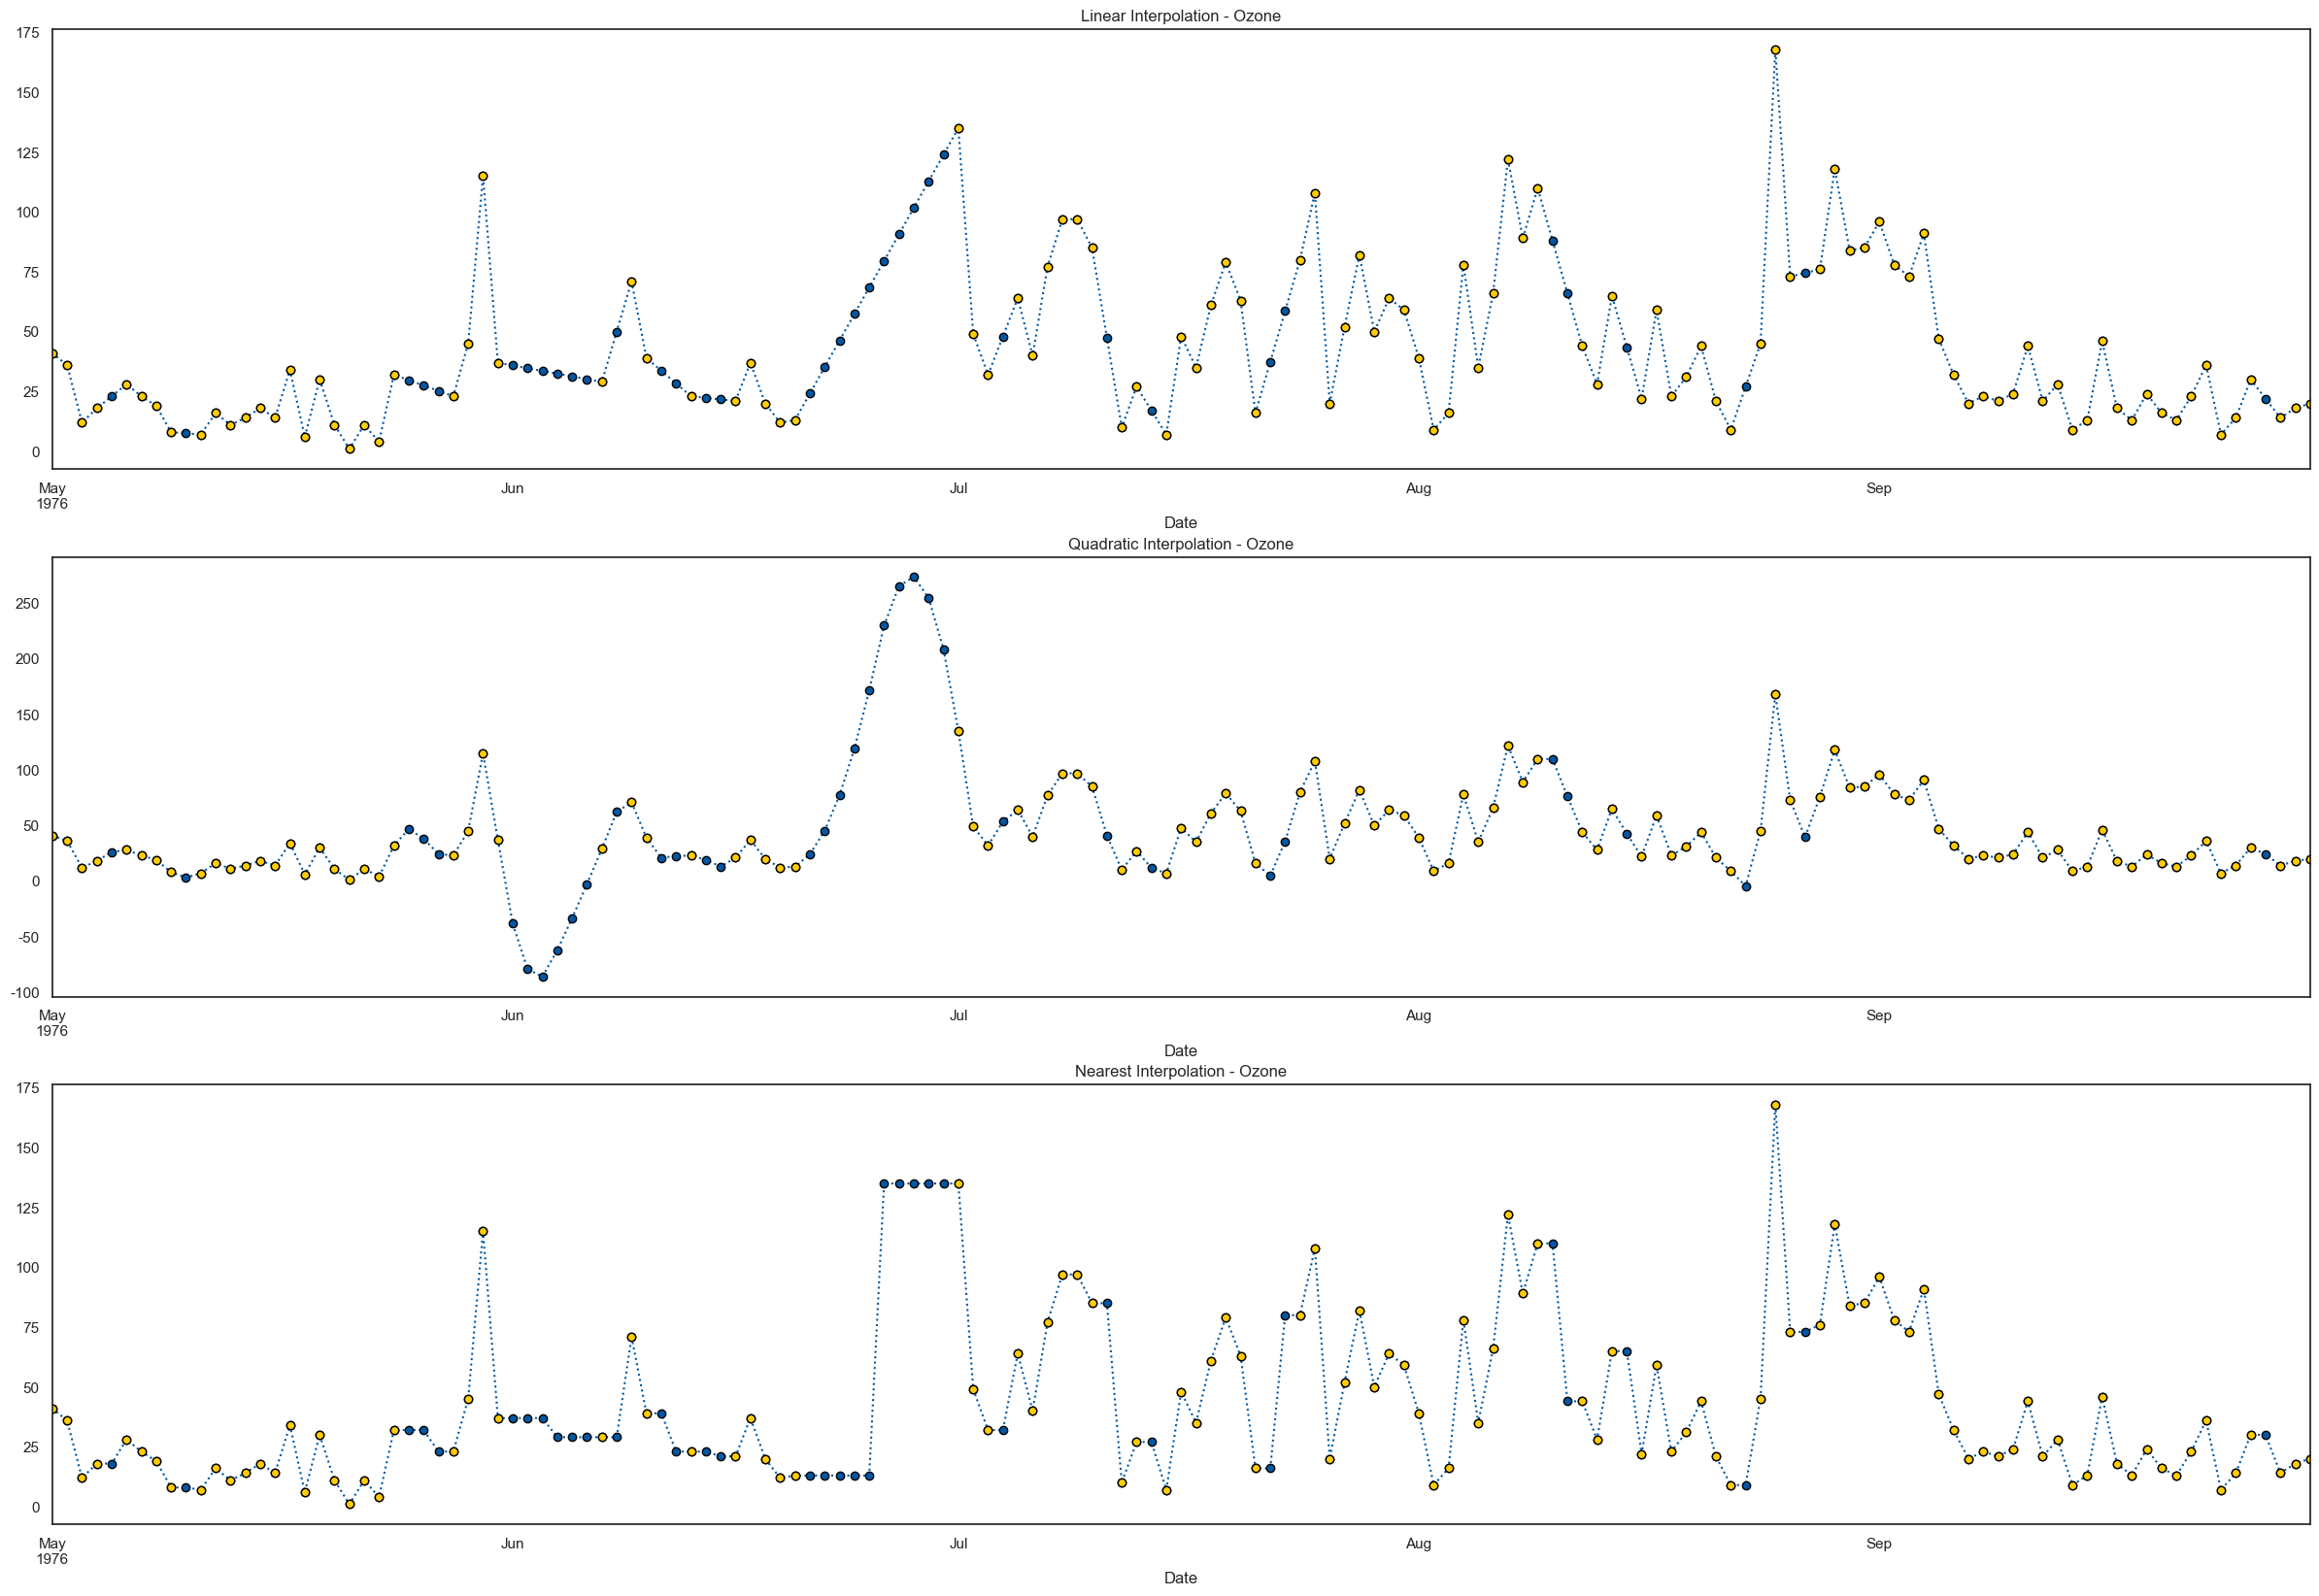

In [90]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(30, 20))

linear = df.interpolate(method='linear')
quadratic = df.interpolate(method='quadratic')
nearest = df.interpolate(method='nearest')

interpolations = {
    'Linear Interpolation': linear,
    'Quadratic Interpolation': quadratic,
    'Nearest Interpolation': nearest
}

# IKEA's blue and yellow, with black for contrast
ikea_blue = "#0058a3"  # A shade of blue similar to IKEA's
ikea_yellow = "#ffcc00"  # A shade of yellow similar to IKEA's
ikea_light_blue = "#99ccff"  # A lighter shade of blue for dotted lines
ikea_black = "#000000"  # Black for marker outlines

for ax, df_key in zip(axes, interpolations):
    # Plot interpolated data in IKEA blue with light blue dotted lines
    interpolations[df_key].Ozone.plot(color=ikea_blue, marker='o',
                                      linestyle='dotted', markeredgecolor=ikea_black,
                                      ax=ax)
    # Plot original data in IKEA yellow with black outlines for markers
    df.Ozone.plot(title=df_key + ' - Ozone', color=ikea_yellow, marker='o',
                  markeredgecolor=ikea_black, linestyle='', ax=ax)

plt.show()


# 離群值偵測

一般過濾的閥值沒有標準答案，端看資料的解析度，資料量和品質本來就是 trad off 的問題

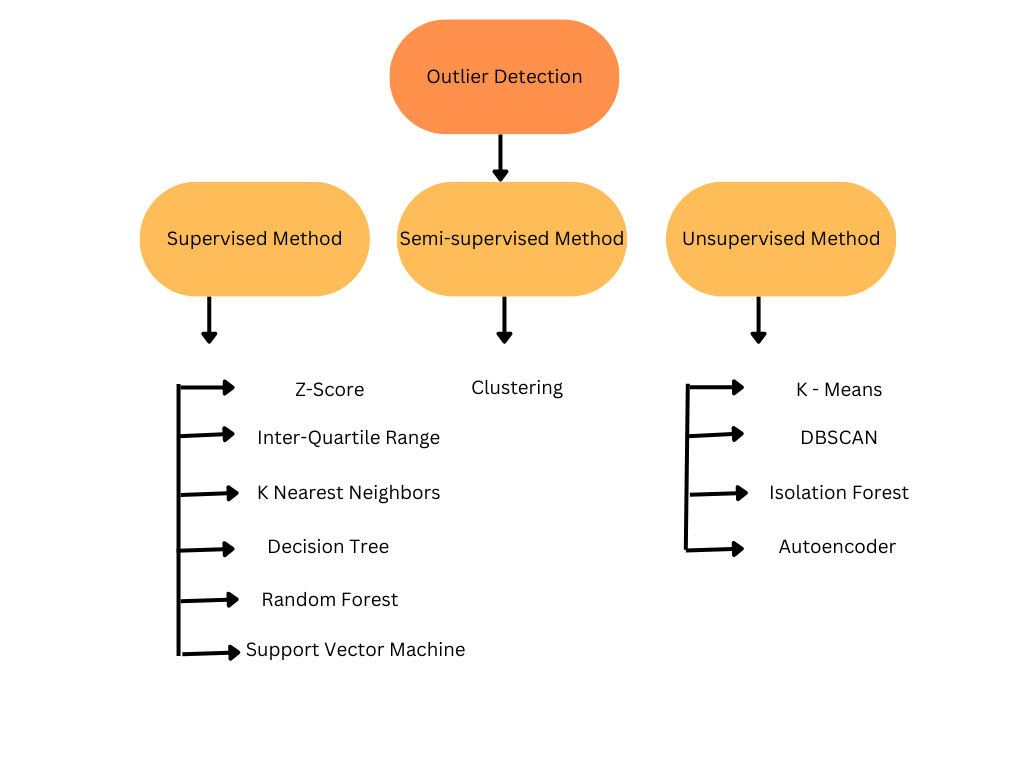


1. `Supervised methods`: These methods use labeled data to identify outliers. For example, a supervised outlier detection algorithm may use a decision tree or a random forest to classify data points as outliers or non-outliers based on the features of the data.

2. `Semi-supervised methods`: These methods use a combination of labeled and unlabeled data to identify outliers. For example, a semi-supervised outlier detection algorithm may use clustering to group similar data points together and then use the labeled data to identify outliers within the clusters.

3. `Unsupervised methods`: These methods use only unlabeled data to identify outliers. For example, unsupervised outlier detection methods can use density-based or distance-based methods to identify data points that are far away from the rest of the data. Some popular unsupervised methods include the Local Outlier Factor (LOF), k-nearest neighbor (KNN) based method, DBSCAN, and Isolation Forest.

## 標準差過濾法

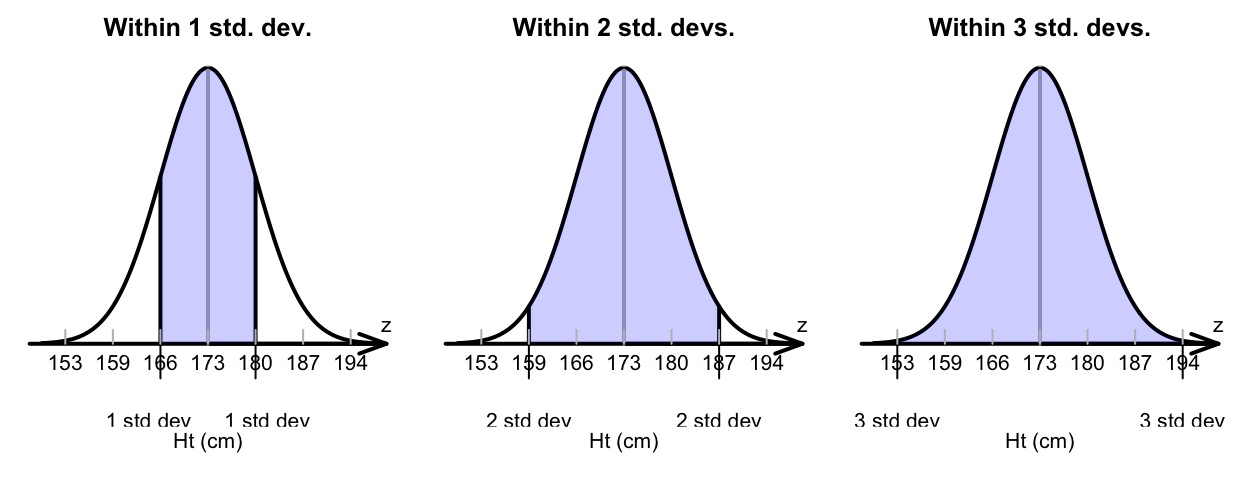

[34.0, 42.0, 33.0, 52.0, 19.0, 37.0, 26.0, 30.0, 36.0, 16.0, 36.0, 27.0, 13.0, 47.0, 50.0, 26.0, 29.0, 37.0, 31.0, 30.0, 23.0, 24.0, 49.0, 28.0, 8.0, 40.0, 24.0, 29.0, 25.0, 31.0, 20.0, 32.0, 32.0, 27.0, 4.0, 30.0, 45.0, 22.0, 25.0, 41.0, 23.0, 29.0, 34.0, 29.0, 23.0, 23.0, 14.0, 33.0, 22.0, 23.0, 15.0, 28.0, 27.0, 23.0, 33.0, 44.0, 27.0, 14.0, 21.0, 5.0, 38.0, 36.0, 22.0, 31.0, 35.0, 38.0, 30.0, 34.0, 28.0, 28.0, 40.0, 29.0, 10.0, 34.0, 30.0, 21.0, 39.0, 37.0, 28.0, 18.0, 42.0, 32.0, 34.0, 25.0, 50.0, 23.0, 35.0, 28.0, 18.0, 16.0, 17.0, 29.0, 37.0, 20.0, 18.0, 5.0, 28.0, 29.0, 19.0, 23.0]


<Figure size 1000x600 with 0 Axes>

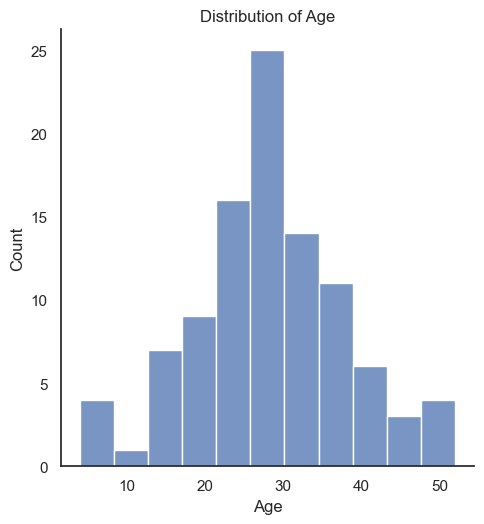

Outliers w/ 1 std dev: [42.0, 52.0, 16.0, 13.0, 47.0, 50.0, 49.0, 8.0, 40.0, 4.0, 45.0, 41.0, 14.0, 15.0, 44.0, 14.0, 5.0, 40.0, 10.0, 39.0, 18.0, 42.0, 50.0, 18.0, 16.0, 17.0, 18.0, 5.0]
Outliers w/ 2 std dev: [52.0, 50.0, 49.0, 8.0, 4.0, 5.0, 50.0, 5.0]
Outliers w/ 3 std dev: []


In [109]:
# Importing Required Libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

mean=30,
std_dev = 10
samples = 100
#generating a random normally distributed data 
age_data = np.random.normal(loc=mean, scale=std_dev, size=samples)

#rounding up the values to 0 decimal places 
age_data = np.round(age_data, decimals=0) 
age_data = age_data.tolist() # converting the array to list
print (age_data)


# Visualise the data
fig = plt.figure(figsize=(10, 6))  # 調整畫布大小

sns.set_style("white")
sns.displot(data=age_data).set(title="Distribution of Age", xlabel="Age")

plt.show()

#Calculate the mean and standard deviation
mean = np.mean(age_data) 
std_dev = np.std(age_data)

# Set a threshold for the number of standard deviations away from the mean threshold = 2

#Identify outliers 
threshold = 1


for threshold in range(1, 4):
    outliers = []
    for age in age_data: 
        if abs(age - mean)> threshold * std_dev:
           outliers.append(age)
    print(f"Outliers w/ {threshold} std dev:", outliers)



## 5% 過濾法

In [118]:
lower_lim = np.percentile(a = age_data, q= 5).round(2)
upper_lim = np.percentile(a = age_data, q = 95).round(2)
print('lower limit is', lower_lim)
print('upper limit is', upper_lim)

outlier4 =[]
for x in age_data: 
    if x > upper_lim or x < lower_lim:
         outlier4.append(x)


print('outliers over upper/lower limit 5% in the dataset are', outlier4)

lower limit is 12.85
upper limit is 45.1
outliers over upper/lower limit 5% in the dataset are [52.0, 47.0, 50.0, 49.0, 8.0, 4.0, 5.0, 10.0, 50.0, 5.0]


## IQR 過濾法
## 透過 box pot 來檢視資料分布，一般定義超過 1.5 倍 IQR 為離群值
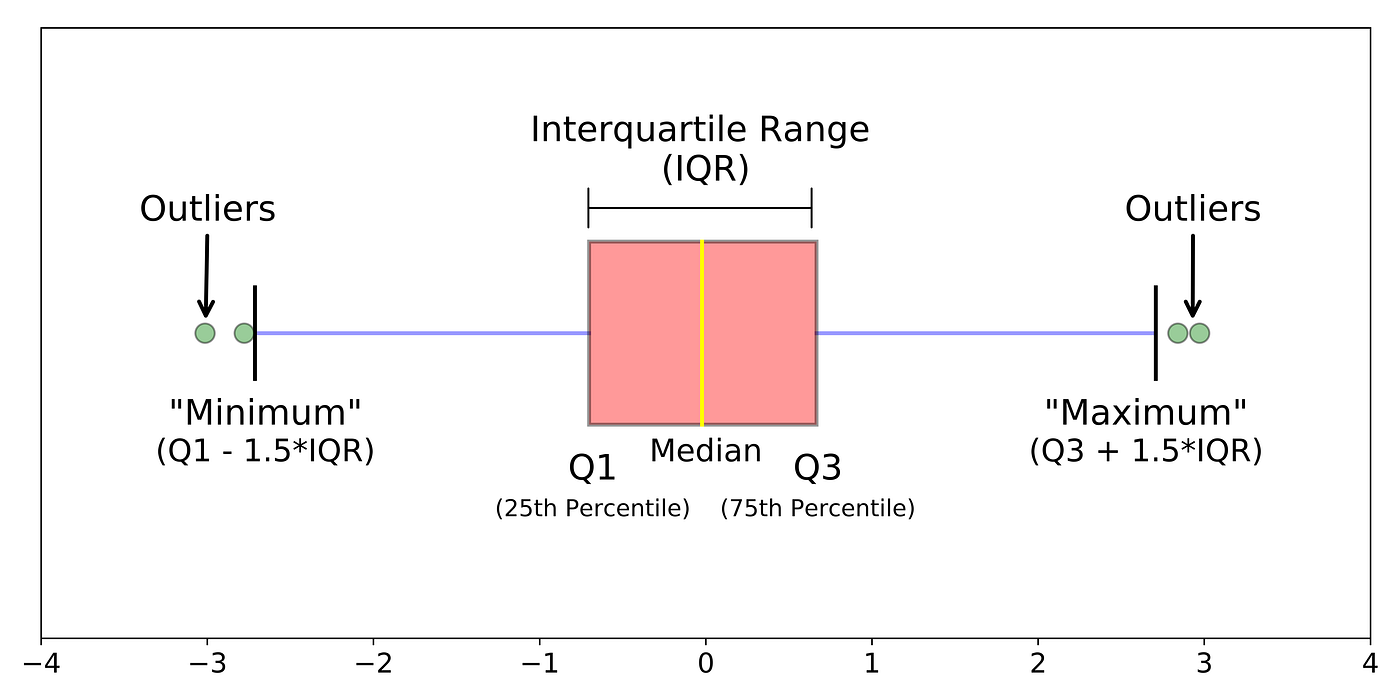

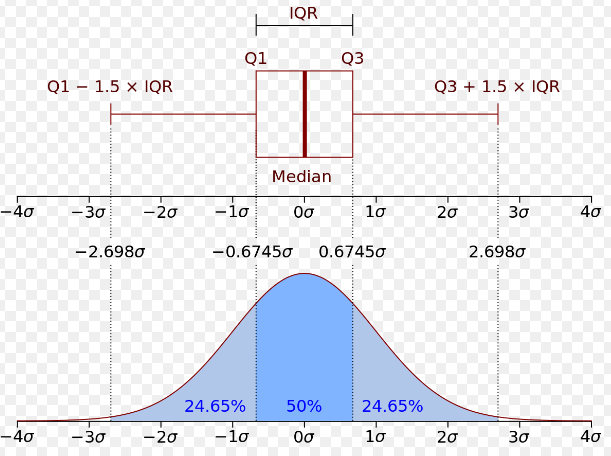

## 定義 function 計算 超過 IQR 的 outlier 的比例

In [108]:
def calculate_outlier_ratios(df):
    # 初始化一個空的列表，用於存儲每個列的離群值比例數據
    outlier_ratios = []
    
    # 遍歷DataFrame中的每一列
    for column_name in df.columns:
        if pd.api.types.is_numeric_dtype(df[column_name]):
            # 計算Q1和Q3
            Q1 = df[column_name].quantile(0.25)
            Q3 = df[column_name].quantile(0.75)
            
            # 計算IQR
            IQR = Q3 - Q1
            
            # 定義離群值範圍
            outlier_lower = Q1 - 1.5 * IQR
            outlier_upper = Q3 + 1.5 * IQR
            
            # 計算離群值的數量
            outliers = df[column_name][(df[column_name] < outlier_lower) | (df[column_name] > outlier_upper)]
            outlier_count = outliers.count()
            
            # 計算離群值比例
            outlier_ratio = outlier_count / len(df[column_name])
            
            # 將結果存儲在列表中
            outlier_ratios.append({'Column': column_name, 'Outlier Ratio': outlier_ratio})
    
    # 將結果轉化為DataFrame
    outlier_report = pd.DataFrame(outlier_ratios)
    
    return outlier_report

calculate_outlier_ratios(df)

,Column,Outlier Ratio
0,Ozone,0.013072
1,Solar,0.000000
2,Wind,0.019608
3,Temp,0.000000


進階離群值判定可以參考以下 github

https://github.com/yzhao062/pyod